## Inner Products

In [2]:
import laguide as lag
import numpy as np
import scipy.linalg as sla
%matplotlib inline
import matplotlib.pyplot as plt
import math

**Exercise 1:** Create a Python function named $\texttt{Magnitude}$ that accepts as an argument vector in the form of a NumPy array object with shape $n\times 1$, and returns the magnitude of that vector.


In [2]:
def Magnitude(U):
    ''' 
    Magnitude(U)
    
    Magnitude computes the magnitude of U based on the Euclidean inner product
    
    Parameters
    ----------
    U : NumPy array object of dimension nx1
    
    Returns
    -------
    product: float
    '''
    # Check shape of U
    if (U.shape[1] != 1):
        print("Magnitude only accepts column vectors.")
        return
    
    magnitude = math.sqrt(DotProduct(U,U))
    return magnitude

**Exercise 2:** Use the $\texttt{random}$ module of NumPy to generate random $4\times 1$ vectors $U$, $V$, and $W$, and a random scalar $k$.  Verify the algebraic properties of the dot product listed above.  Try to make use of a conditional statement to check each statement.

We want to verify that the following equations hold for random $4 \times 1$ vectors $U, V,$ and $W$ and scalar $k$.
1. $U\cdot V = V\cdot U$
2. $U\cdot(V + W) = U\cdot V + U\cdot W$
3. $(kU)\cdot V = k(U\cdot V)$
4. $U\cdot U \ge 0$

In [6]:
U = np.random.randint(20,size=(4,1))
V = np.random.randint(20,size=(4,1))
W = np.random.randint(20,size=(4,1))
k = np.random.randint(20)

print(U,'\n')
print(V,'\n')
print(W,'\n')
print(k,'\n')

if (lag.DotProduct(U,V) == lag.DotProduct(V,U)):
    print("The dot product is commutative. \n")
if (lag.DotProduct(U,V+W) == lag.DotProduct(U,V) + lag.DotProduct(U,W)):
    print("The dot product distributes over vector addition. \n")
if (lag.DotProduct(k*U,V) == k*lag.DotProduct(U,V)):
    print("The dot product is associative with respect to scalar multiplication. \n")
if (lag.DotProduct(U,U) >= 0):
    print("The dot product of a vector with itself is greater than or equal to 0 \n")

[[ 7]
 [19]
 [11]
 [11]] 

[[8]
 [0]
 [6]
 [1]] 

[[12]
 [14]
 [12]
 [18]] 

9 

The dot product is commutative. 

The dot product distributes over vector addition. 

The dot product is associative with respect to scalar multiplication. 

The dot product of a vector with itself is greater than or equal to 0 



**Exercise 3:** Let $X$ and $Y$ be the following vectors.

$$
\begin{equation}
X = \left[ \begin{array}{r} 3 \\ -1 \\ 2  \end{array}\right] \hspace{1cm} 
Y = \left[ \begin{array}{r} 4 \\ 2 \\ 0  \end{array}\right] 
\end{equation}
$$

$(a)$ Determine the angle between $X$ and $Y$.  (*You will need the $\texttt{acos}$ function in Python's $\texttt{math}$ module.*)

We will use the following equation to determine the angle $\theta$ between $X$ and $Y$, as well as the $\texttt{DotProduct}$ and $\texttt{Magnitude}$ functions.

$$
\begin{equation}
\cos{\theta} = \frac{X\cdot Y}{||X||||Y||}
\end{equation}
$$

In [8]:
X = np.array([[3],[-1],[2]])
Y = np.array([[4],[2],[0]])
print(math.acos((lag.DotProduct(X,Y))/((lag.Magnitude(X))*(lag.Magnitude(Y)))))

0.9302740141154721


$(b)$ Find a vector in $\mathbb{R}^3$ that is orthogonal to the vector $X$.  Verify your answer with a computation.

Two vectors are **orthogonal** if their dot product is zero. The vector $W$ defined below is an example of a vector that is orthogonal to $X$.

$$
\begin{equation}
W = \left[ \begin{array}{r} 1 \\ 3 \\ 0  \end{array}\right] 
\end{equation}
$$

In [38]:
X = np.array([[3],[-1],[2]])
W = np.array([[1],[3],[0]])
print(lag.DotProduct(X,W))

0.0


$(c)$ Construct a unit vector $Z$ such that $Z\cdot Y = -||Y||$.  Verify your answer with a computation.

**Solution:**

Recall that if $\theta$ is the angle between $Z$ and $Y$, then the following equation is an identity.

$$
\begin{equation}
\frac{Z\cdot Y}{||Z||||Y||} = \cos\theta
\end{equation}
$$

Since we want $Z$ to be a unit vector, $||Z|| = 1$ and so we can rearrange to get

$$
\begin{equation}
Z\cdot Y = ||Y||\cos{\theta} 
\end{equation}
$$

From here we can see that $Z \cdot Y = -||Y||$ precisely when $\theta = \pi$ or in other words, when $Z$ is a unit vector pointing in the opposite direction of $Y$. To find such a $Z$, we can take any vector that points in the direction opposite to $Y$ ($-Y$ for example) and divide by its magnitude. Therefore

$$
\begin{equation}
Z = \frac{-Y}{||-Y||} = \frac{1}{\sqrt{20}} \left[ \begin{array}{r} -4 \\ -2 \\ 0  \end{array}\right] = \left[ \begin{array}{r} \frac{-2\sqrt{5}}{5} \\ -\frac{\sqrt{5}}{5} \\ 0  \end{array}\right]
\end{equation}
$$



In [47]:
Y = np.array([[4],[2],[0]])
Z = np.array([[-2*np.sqrt(5)/5],[-np.sqrt(5)/5],[0]])
print(lag.DotProduct(Z,Y),'\n')
print(-lag.Magnitude(Y),'\n')
print(lag.Magnitude(Z))

-4.47213595499958 

-4.47213595499958 

1.0


**Alternate Solution:**

First we calculate $-||Y|| = -\sqrt{4^2 + 2^2 + 0^2} = -2\sqrt{5}$. If we define the arbitrary vector $Z$ as below, then we see that we need to find values for $z_1, z_2$, and $z_3$ such that $||Z|| = \sqrt{(z_1)^2 + (z_2)^2 + (z_3)^2} = 1$ and $Z \cdot Y = 4z_1 + 2z_2 + 0z_3 = -2\sqrt{5}$.

$$
\begin{equation}
Z = \left[ \begin{array}{r} z_1 \\ z_2 \\ z_3  \end{array}\right] 
\end{equation}
$$

Since $z_3$ contributes nothing to the second sum above, lets set $z_3 = 0$ for simplicities sake. This gives a system of two equations in two unknowns, namely

$$
\begin{eqnarray*}
4z_1 + 2z_2 & = & -2\sqrt{5} \\
z_1^2 + z_2^2 & = & 1 \\
\end{eqnarray*}
$$

Note that we can't solve this system using elimination because the second equation is not linear.  Instead, if we solve for one of the variables in the first equation and substitute into the second, we will be able to use the quadratic formula to find a solution. Solving for $z_2$ in the first equation, we get

$$
\begin{eqnarray*}
z_2 & = & -\sqrt{5} - 2z_1 \\
\end{eqnarray*}
$$

Next we substitute this equality in for $z_2$ in our second equation, multiply out and move everything to the left.

$$
\begin{eqnarray*}
5z_1^2 + 4\sqrt{5}z_1 + 4 = 0 \\
\end{eqnarray*}
$$

Using the quadratic formula reveals that the two roots of this equation are equal, namely $z_1 = -\frac{2}{5}\sqrt{5}$. If we substitute this into the equation above where we had solved for $z_2$, we see that $z_2 = -\frac{1}{5}\sqrt{5}$ and thus the vector $Z$ below is a solution to our problem.

$$
\begin{equation}
Z = \left[ \begin{array}{r} -\frac{2\sqrt{5}}{5} \\ -\frac{\sqrt{5}}{5} \\ 0  \end{array}\right] 
\end{equation}
$$

**Exercise 4:** Create a Python function named $\texttt{DifferenceMagnitude}$ which takes two $n \times 1$ vectors as arguments and returns the magnitude of their difference. Use this function to determine $|| X - Y||$ where vectors $X$ and $Y$ are given below.

$$
\begin{equation}
X = \left[ \begin{array}{r} 3 \\ -1 \\ 2  \end{array}\right] \hspace{1cm} 
Y = \left[ \begin{array}{r} 4 \\ 2 \\ 0  \end{array}\right] 
\end{equation}
$$

In [12]:
# Building the function Difference Magnitude where X and y are two column vectors.

def DifferenceMagnitude(X,Y):
    Z = X - Y
    diffMag = math.sqrt(lag.DotProduct(Z,Z))
    return diffMag

X = np.array([[3],[-1],[2]])
Y = np.array([[4],[2],[0]])

print(DifferenceMagnitude(X,Y))

3.7416573867739413


We can see from the computations that $||X - Y|| = 3.714$.

**Exercise 5:** Create a Python function which takes an $n \times 1$ vector as its argument and returns the unit vector of the argument vector. Use the NumPy $\texttt{random}$ module to generate a random $3 \times 1 $ vector, and test this function on that vector.

In [5]:
## Creating the UnitVector function

def UnitVector(X):
    mag = math.sqrt(lag.DotProduct(X,X))
    unitVect = X/mag
    
    return unitVect

## Building a random vector
X = np.random.randint(10,size = (3,1))
print("X: \n" , X, '\n')
print("The unit vector of X: \n", UnitVector(X), '\n')

X: 
 [[5]
 [6]
 [8]] 

The unit vector of X: 
 [[0.4472136 ]
 [0.53665631]
 [0.71554175]] 



**Exercise 6:** Find a vector $Y$ in $\mathbb{R}^2$ such that $X\cdot Y = ||Y - X||$ where the vector $X$ is given below. Is the vector $Y$ unique ? Verify your answer through a computation.

$$
\begin{equation}
X = \left[ \begin{array}{r} 1 \\ 1  \end{array}\right] 
\end{equation}
$$

**Solution:**

Let us assume that the vector $Y$ in $\mathbb{R}^2$ is as follows:


$$
\begin{equation}
Y = \left[ \begin{array}{r} a \\ b  \end{array}\right] 
\end{equation}
$$


where $a$, $b$ are some scalars.


So, $$
\begin{equation}
Y  - X= \left[ \begin{array}{r} a - 1 \\ b - 1  \end{array}\right] 
\end{equation}
$$


$||Y - X||^2 = (a-1)^2 + (b-1)^2 $

$X\cdot Y = a + b$

As $X\cdot Y = ||Y - X||$ , $(X\cdot Y)^2 = ||Y - X||^2 $.

So, $ (a+b)^2 = (a - 1)^2 + (b-1)^2 $

$ a^2 + b^2 + 2ab = a^2 + 1 - 2a + b^2 + 1 - 2b$

$ 2ab = 2 - 2a - 2b$

 $2a + 2b + 2ab = 2$

$ a + b + ab = 1$

The above equation is true for two possible set of real values of $a$ and $b$. First case is when $a = 0$ and $b = 1$, and second case is when $a = 1$ and $b = 0$.

Therefore, we get two possible vectors $Y$ which are as follows:

So, $$
\begin{equation}
Y = \left[ \begin{array}{r} 1 \\ 0  \end{array}\right] \hspace{1cm} or \hspace{1cm}
Y = \left[ \begin{array}{r} 0 \\ 1  \end{array}\right]
\end{equation}
$$


This implies that the vector $Y$ is not unique. We can verify our results in the code cell below.

In [17]:
# Building vectors X and Y:

X = np.array([[1],[1]])
Y_1 = np.array([[1],[0]])
Y_2 = np.array([[0],[1]])

dotProd1 = lag.DotProduct(X, Y_1)
dotProd2 = lag.DotProduct(X, Y_2)

diffMag1 = DifferenceMagnitude(Y_1, X )
diffMag2 = DifferenceMagnitude(Y_2, X)

print("Dot product of X and Y_1 is: \n", dotProd1, '\n')
print("The magnitude of difference of Y_1 and X is: \n", diffMag1, '\n')

print("Dot product of X and Y_2 is: \n", dotProd2, '\n')
print("The magnitude of difference of Y_2 and X is: \n", diffMag2, '\n')

Dot product of X and Y_1 is: 
 1.0 

The magnitude of difference of Y_1 and X is: 
 1.0 

Dot product of X and Y_2 is: 
 1.0 

The magnitude of difference of Y_2 and X is: 
 1.0 



The computations done in the above code cell demonstrate that the vector $Y$ is not unique.

**Exercise 7:** Create a Python function named $\texttt{Angle}$ which takes two vectors as arguments and returns $\cos{\theta}$ where ${\theta}$ is the angle between the two vectors. Use this function to show that vectors $U$ and $W$ are orthogonal.

$$
\begin{equation}
U = \left[ \begin{array}{r} 1 \\ -1 \\ 2  \end{array}\right] \hspace{1cm} 
W = \left[ \begin{array}{r} 2 \\ 0 \\ -1  \end{array}\right] 
\end{equation}
$$

In [6]:
## Building the function Angle

def Angle(X,Y):
    dotProd = lag.DotProduct(X, Y)
    magX = math.sqrt(lag.DotProduct(X, X))
    magY = math.sqrt(lag.DotProduct(Y, Y))
    cos_theta = dotProd/(magX*magY)
    
    return cos_theta

U = np.array([[1],[-1],[2]])
W = np.array([[2],[0],[-1]])

print(Angle(U, W))

0.0


We can see that $\cos{\theta} = 0$ for vectors $U$ and $W$ which means that $\theta = 90^{\circ}$. This implies that $U$ and $W$ are orthogonal vectors.

**Exercise 8:** Given that $||X+Y|| = 3$, $X\cdot Y = 2$, find $||X-Y||$.

**Solution:**

We know that $||X + Y||^2 = (X+Y)\cdot (X+Y)$

$||X + Y||^2 = ||X||^2 + ||Y||^2 + 2X\cdot Y$

Given $||X + Y||$ and $X\cdot Y$,we can find $||X||^2  + ||Y||^2$ as follows:

$ (3)^2 = ||X||^2 + ||Y||^2 + 2(2)$

$||X||^2 + ||Y||^2 = 5$

Now, $||X - Y||^2 = (X-Y)\cdot (X-Y)$

$||X - Y||^2 = ||X||^2 + ||Y||^2 - 2X\cdot Y$

We can now substitute the values for $||X||^2 + ||Y||^2$ and $X\cdot Y$ to get:

$||X - Y||^2 = 5 - 2(2)$

$||X - Y||^2 = 1$

Therefore, $||X - Y|| = 1$

### Orthogonalization

**Exercise 1:**  Explain why a set of nonzero mutually orthogonal vectors must be linearly independent.  

**Solution:**

Suppose we have some set of mutually orthogonal vectors $\{U_1,U_2, \cdots ,U_n\}$. To say that this set is linearly independent is equivalent to saying that if $a_1U_1 + a_2U_2 + \cdots a_nU_n = 0$ for some scalars $a_1, a_2, \cdots , a_n$, then $a_1 = a_2 = \cdots a_n = 0$. To see that this must be the case, take the dot product of each side of the equation with $U_i$ for each $1 \leq i \leq n$. Since the vectors are mutually orthogonal, $U_i \cdot U_j = 0$ when $i \neq j$ and thus we get $a_i(U_i \cdot U_i) = 0$. Therefore $a_i = 0$ for all $1 \leq i \leq n$ and so our set of vectors is linearly independent.

**Exercise 2:**  Derive the formula for the projection of $B$ onto $V$ in another way that doesn't involve $\cos{\theta}$.  Let $\hat{B} = kV$, where $k$ is an unknown scalar.  Now use $\hat{B}\cdot E$ to determine $k$ directly.

**Exercise 3:** The set $\beta = \{U_1, U_2, U_3\}$ is an orthonormal basis for $\mathbb{R}^3$.

$$
\begin{equation}
U_1 = \frac{1}{\sqrt{6}}\left[ \begin{array}{r} 2 \\ 1 \\ 1 \end{array}\right] \hspace{0.7cm} 
U_2 = \frac{1}{\sqrt{2}}\left[ \begin{array}{r} 0 \\ -1 \\ 1 \end{array}\right] \hspace{0.7cm}
U_3 = \frac{1}{\sqrt{3}}\left[ \begin{array}{r} -1 \\ 1 \\ 1 \end{array}\right] \hspace{0.7cm}
\end{equation}
$$

$(a)$ Define $Q$ as the matrix with columns $U_1$, $U_2$, and $U_3$.  Verify that $Q^TQ=I$.

**Solution:**

In [6]:
s2 = math.sqrt(2)
s3 = math.sqrt(3)
s6 = math.sqrt(6)
Q = np.array([[2/s6,0,-1/s3],[1/s6,-1/s2,1/s3],[1/s6,1/s2,1/s3]])
print(Q.transpose()@Q)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


$(b)$ Let $X$ be the following vector, and compute $[X]_{\beta}$ by solving $Q[X]
_{\beta}= X$.

$$
\begin{equation}
X = \left[ \begin{array}{r} 3 \\ 1 \\ -4 \end{array}\right] 
\end{equation}
$$

**Solution:**

Since $Q^TQ = I$, multiplying both sides of the equation above by $Q^T$ on the left gives us $[X]_{\beta} = Q^TX$.

In [7]:
s2 = math.sqrt(2)
s3 = math.sqrt(3)
s6 = math.sqrt(6)
Q = np.array([[2/s6,0,-1/s3],[1/s6,-1/s2,1/s3],[1/s6,1/s2,1/s3]])
X = np.array([[3],[1],[-4]])
print(Q.transpose()@X)

[[ 1.22474487]
 [-3.53553391]
 [-3.46410162]]


**Exercise 4:** Find a vector that is orthogonal to the column space of the matrix $A$.

$$
\begin{equation}
A = \left[ \begin{array}{rr} 1 & 2\\ 2 & 0 \\ 3 & 1\end{array}\right] 
\end{equation}
$$

**Solution:**

Since there is a pivot in each column of the matrix $A$, the basis for the column space of $A$ consists of the two column vectors. 

Let 


$$
\begin{equation}
X_1 = \left[ \begin{array}{r} 1 \\ 2 \\ 3 \end{array}\right] \hspace{1cm}
X_2 = \left[ \begin{array}{r} 2 \\ 0 \\ 1 \end{array}\right] 
\end{equation}
$$

Then the basis for the column space of $A$ is $\{X_1,X_2\}$. Let us consider a vector $Y$ which is orthogonal to vectors $X_1$, $X_2$. This means that $X_1\cdot Y = 0$ and $X_2\cdot Y=0$.

Let

$$
\begin{equation}
Y = \left[ \begin{array}{r} a \\ b \\ c \end{array}\right] \hspace{1cm} 
\end{equation}
$$

where $a$, $b$, $c$ are some scalars.

The conditions $X_1\cdot Y = 0$ and $X_2\cdot Y=0$ gives a system of equations to solve:


$$
\begin{eqnarray*}
a + 2b + 3c & = & 0\\
2a\,\,\,\,\,\,\,\,\,\,\,\,\, + c & = & 0\\ 
\end{eqnarray*}
$$

Since $c$ is a free variable we let $c = t$, where $t$ is some real number.  From the above two equations, we can then find the values of $a$ and $b$ in terms of $t$.

$a = -t/2$  and $b = -5t/4$.


Therefore, the vector $Y$ is as follows:


$$
\begin{equation}
Y = t\left[ \begin{array}{r} -1/2 \\ -5/4 \\ 1 \end{array}\right] \hspace{1cm} 
\end{equation}
$$



So, one particular vector orthogonal to the column space of $A$ is:


$$
\begin{equation}
\left[ \begin{array}{r} -1/2 \\ -5/4 \\ 1 \end{array}\right] \hspace{1cm} 
\end{equation}
$$

**Exercise 5:** Let $\mathcal{U}$ be the subspace spanned by $\{V_1,V_2\}$. Apply the Gram-Schimdt orthogonalization on the basis $\{V_1,V_2\}$ to produce an orthonormal basis $\{U_1,U_2\}$ for $\mathcal{U}$.  Verify that $\{U_1,U_2\}$ is an orthonormal basis with a computation.

$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 1 \\ 1 \\ 2 \end{array}\right] \hspace{1cm}
V_2 = \left[ \begin{array}{r} 2 \\ 1 \\ 3 \end{array}\right] 
\end{equation}
$$


**Solution:**

We first produce an orthogonal basis, $\{W_1,W_2\}$, for $\mathcal{U}$, then scale the orthogonal vectors to produce an orthonormal basis $\{U_1,U_2\}$.

In [3]:
## Generating the orthogonal vectors w_1 and w_2:

v_1 = np.array([[1],[1],[2]])
v_2 = np.array([[2],[1],[3]])

w_1 = v_1 
w_2 = v_2 - (lag.DotProduct(w_1, v_2)/lag.DotProduct(w_1, w_1))*w_1

# Generating the orthonormal vectors by scaling the orthogonal vectors:

u_1 = w_1/math.sqrt(lag.DotProduct(w_1,w_1))
u_2 = w_2/math.sqrt(lag.DotProduct(w_2,w_2))

print("u_1: \n", u_1, '\n')
print("u_2: \n", u_2, '\n')

# Verifying that u_1 and u_2 are orthonormal.

print("The dot product of u_1 and u_2 is: \n", lag.DotProduct(u_1,u_2),'\n')
print("The magnitude of u_1 is: \n", math.sqrt(lag.DotProduct(u_1,u_1)), '\n')
print("The magnitude of u_2 is: \n", np.round(math.sqrt(lag.DotProduct(u_2,u_2)), 2), '\n')

u_1: 
 [[0.40824829]
 [0.40824829]
 [0.81649658]] 

u_2: 
 [[ 0.70710678]
 [-0.70710678]
 [ 0.        ]] 

The dot product of u_1 and u_2 is: 
 0.0 

The magnitude of u_1 is: 
 1.0 

The magnitude of u_2 is: 
 1.0 



**Exercise 6:** Let $\mathcal{U}$ be the subspace spanned by $\{X_1,X_2\}$. Apply the Gram-Schimdt orthogonalization on the basis $\{X_1,X_2\}$ to produce an orthonormal basis $\{U_1,U_2\}$ for $\mathcal{U}$.  Verify that $\{U_1,U_2\}$ is an orthonormal basis with a computation.

$$
\begin{equation}
X_1 = \left[ \begin{array}{r} 1 \\ 0 \\ 2 \\ 2 \end{array}\right] \hspace{0.7cm} 
X_2 = \left[ \begin{array}{r} -2 \\ 1 \\ 0 \\ -1 \end{array}\right]
\end{equation}
$$

We first produce an orthogonal basis, $\{W_1,W_2\}$, for $\mathcal{U}$, then scale the orthogonal vectors to produce an orthonormal basis $\{U_1,U_2\}$.

In [2]:
## Generating the orthogonal vectors w_1 and w_2:

x_1 = np.array([[1],[0],[2],[2]])
x_2 = np.array([[-2],[1],[0],[-1]])

w_1 = x_1 
w_2 = x_2 - (lag.DotProduct(w_1, x_2)/lag.DotProduct(w_1, w_1))*w_1

# Generating the orthonormal vectors by scaling the orthogonal vectors:

u_1 = w_1/math.sqrt(lag.DotProduct(w_1,w_1))
u_2 = w_2/math.sqrt(lag.DotProduct(w_2,w_2))

print("u_1: \n", u_1, '\n')
print("u_2: \n", u_2, '\n')

# Verifying that u_1 and u_2 are orthonormal.

print("The dot product of u_1 and u_2 is: \n", np.round(lag.DotProduct(u_1,u_2),4),'\n')
print("The magnitude of u_1 is: \n", math.sqrt(lag.DotProduct(u_1,u_1)), '\n')
print("The magnitude of u_2 is: \n", np.round(math.sqrt(lag.DotProduct(u_2,u_2)), 2), '\n')

u_1: 
 [[0.33333333]
 [0.        ]
 [0.66666667]
 [0.66666667]] 

u_2: 
 [[-0.7570333 ]
 [ 0.48666426]
 [ 0.43259046]
 [-0.05407381]] 

The dot product of u_1 and u_2 is: 
 -0.0 

The magnitude of u_1 is: 
 1.0 

The magnitude of u_2 is: 
 1.0 



**Exercise 7:** Let $V$ be a vector in $\mathbb{R}^4$. Explain why the set of vectors orthogonal to $V$ is a subspace of $\mathbb{R}^4$.

**Solution:**

Let $U$ be the set of all vectors which are orthogonal to the vector $v$. Let us consider two vectors $x$ and $y$ in $U$.

The vectors $v$, $x$ and $y$ are as follows:


$$
\begin{equation}
v = \left[ \begin{array}{r} v_1 \\ v_2 \\ v_3 \\ v_4 \end{array}\right] \hspace{1cm}
x = \left[ \begin{array}{r}  x_1 \\ x_2 \\ x_3 \\ x_4 \end{array}\right] \hspace{1cm}
y = \left[ \begin{array}{r}  y_1 \\ y_2 \\ y_3 \\ y_4 \end{array}\right] \hspace{1cm}
\end{equation}
$$


where all the enteries are some scalars.


Since vectors $x$ and $y$ are in $U$, the vectors $x$ and $y$ need to be orthogonal to the vector $v$. This basically means that $x\cdot v = 0$ and $y\cdot v = 0$.


So, $x_1v_1 + x_2v_2 +x_3v_3 + x_4v_4 = 0$ ,

$y_1v_1 + y_2v_2 +y_3v_3 + y_4v_4 = 0$.

On adding the two equations, we get

$(x_1 + y_1)v_1 + (x_2 + y_2)v_2 + (x_3 + y_3)v_3 + (x_4 + y_4)v_4 = 0$

The *LHS* is actually the dot product of vector $(x+y)$ with $v$ and since the dot product of vector $(x + y)$ with $v$ equals 0, $(x+y)$ is also in $U$.


On multiplying the equation $x_1v_1 + x_2v_2 +x_3v_3 + x_4v_4 = 0$ by $k$ on both sides, we get:


$kx_1v_1 + kx_2v_2 + kx_3v_3 + kx_4v_4 = k(0) = 0$

The *LHS* of the above equation is basically the dot product of $kx$ and $v$ which also equals zero. Therefore, $kx$ is orthogonal to $v$ and hence, $kx$ is also present in $U$.


This imples that for any two vectors $x$ and $y$ in $U$, vectors $(x+y)$ and $kx$ are also present in $U$. This satisfies the condition for a subspace and therefore, $U$ is a subspace of $\mathbb{R}^4$.

**Exercise 8:** Given vectors $V$ and $W$, find vectors $X$ and $Y$ such that $X$ is the projection of $V$ in the direction of $W$ and $V = X + Y$. Verify your answer.


$$
\begin{equation}
V = \left[ \begin{array}{r} 
9\\ 5 \\ 0 \end{array}\right] \hspace{1cm}
W = \left[ \begin{array}{r} 3 \\ 0 \\ 3 \end{array}\right] 
\end{equation}
$$

In [24]:
## Building vectors V and W:

V = np.array([[9],[5],[0]])
W = np.array([[3],[0],[5]])

X = (lag.DotProduct(V, W)/lag.DotProduct(W, W))*W
Y = V - X

print("X: \n", X, '\n')
print("Y: \n", Y, '\n')

# Verifying if X and Y are orthogonal to each other.

print("The dot product of X and Y is: \n", np.round(lag.DotProduct(X, Y), 8), '\n' )

X: 
 [[2.38235294]
 [0.        ]
 [3.97058824]] 

Y: 
 [[ 6.61764706]
 [ 5.        ]
 [-3.97058824]] 

The dot product of X and Y is: 
 0.0 



**Exercise 9:** Let $U$ be a vector space spanned by the columns of $A$. Find an orthonormal basis for $U$ to generate an orthogonal matrix $Q$. Verify that $Q^TQ = I$ where $I$ is the identity matrix.


$$
\begin{equation}
A = \left[ \begin{array}{r} 1 & 2 & -1\\ 0 & 2 & 1 \\  1 & 1 & 2 \end{array}\right]  
\end{equation}
$$

In [18]:
## Building the matrix A

A = np.array([[1,2,-1],[0,2,1],[1,1,2]])
A_red = lag.FullRowReduction(A)

print("A_reduced: \n", A_red, '\n')

A_reduced: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 



We can see from the above code cell that there is a pivot in each column of $A$. Therefore, the column vectors of $A$ are linearly independent. As $U$ is spanned by the columns of $A$ and the columns of $A$ are linearly independent, we can say that the columns of $A$ are a basis for the vector space $U$.

Let 


$$
\begin{equation}
x_1 = \left[ \begin{array}{r} 1\\ 0 \\ 1 \end{array}\right] \hspace{1cm}
x_2 = \left[ \begin{array}{r} 2 \\ 2 \\ 1 \end{array}\right] \hspace{1cm}
x_3 = \left[ \begin{array}{r} -1 \\ 1 \\ 2 \end{array}\right] \hspace{1cm}
\end{equation}
$$


Then, $U = \texttt{Span}\{x_1,x_2,x_3\}$. Now, we can perform **Gram-Schimdt** orthogonalization on the bases vectors $x_1$, $x_2$, and $x_3$ to get the orthonormal vectors. 

In [10]:
## building the vectors X_1, X_2, X_3:

X_1 = np.array([[1],[0],[1]])
X_2 = np.array([[2],[2],[1]])
X_3 = np.array([[-1],[1],[2]])

## Let the orthogonal vectors be W_1, W_2, W_3:

W_1 = X_1
W_2 = X_2 - (lag.DotProduct(X_2, W_1)/lag.DotProduct(W_1, W_1))*W_1
W_3 = X_3 - (lag.DotProduct(X_3, W_1)/lag.DotProduct(W_1, W_1))*W_1 - (lag.DotProduct(X_3, W_2)/lag.DotProduct(W_2, W_2))*W_2

## Let the orthonormal vectors be U_1, U_2, U_3

U_1 = W_1/math.sqrt(lag.DotProduct(W_1, W_1))
U_2 = W_2/math.sqrt(lag.DotProduct(W_2, W_2))
U_3 = W_3/math.sqrt(lag.DotProduct(W_3, W_3))


print("U_1: \n", U_1, '\n')
print("U_2: \n", U_2, '\n')
print("U_3: \n", U_3, '\n')

## Stacking the orthonormal vectors in a matrix to get the orthogonal matrix Q:

Q = np.hstack([U_1,U_2, U_3])
print("Q: \n", Q, '\n')


## Verification:
Q_T = np.transpose(Q)
I = np.eye(3)


print("Q_T@Q: \n", np.round(Q_T@Q, 8), '\n')
print("I: \n", I, '\n')

U_1: 
 [[0.70710678]
 [0.        ]
 [0.70710678]] 

U_2: 
 [[ 0.23570226]
 [ 0.94280904]
 [-0.23570226]] 

U_3: 
 [[-0.66666667]
 [ 0.33333333]
 [ 0.66666667]] 

Q: 
 [[ 0.70710678  0.23570226 -0.66666667]
 [ 0.          0.94280904  0.33333333]
 [ 0.70710678 -0.23570226  0.66666667]] 

Q_T@Q: 
 [[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]] 

I: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 



In the above code cell, we used **Gram-Schimdt** Orthogonalization to generate a set of orthonormal bases i.e $\{U_1,U_2,U_3\}$. Then, we can generate a matrix $Q$ which contains the orthonormal vectors as its columns. We have also verified that $Q^TQ = I$.

**Exercise 10:** Consider two vectors $X$ and $Y$. Given that $Z$ is the projection of $X$ in the direction of $Y$ and $X \cdot Y = 6$, find $Y$.


$$
\begin{equation}
X = \left[ \begin{array}{r} 2\\ 1 \\ 1 \end{array}\right] \hspace{1cm}
Z = \left[ \begin{array}{r} 1 \\ 1 \\ 0 \end{array}\right] 
\end{equation}
$$

**Solution:**

We have been given that the vector $Z$ is in the direction of vector $Y$. Therefore, the angle between the vector $X$ and the vector $Z$ is same as the angle between the vectors $X$ and $Y$. 

The angle between the vectors $X$ and $Z$ is as follows:

$$
\begin{equation}
\cos{\theta} = \frac{X\cdot Z}{||X||||Z||} = \frac{3}{\sqrt{2} \sqrt{6}} = \frac{\sqrt{3}}{2}
\end{equation}
$$

Hence, $\theta = 30^{\circ}$ and this is also the angle between vectors $X$ and $Y$.


$$
\begin{equation}
\cos{30^{\circ}} = \frac{X\cdot Y}{||X||||Y||} = \frac{6}{\sqrt{6}||Y||} = \frac{\sqrt{3}}{2}
\end{equation}
$$

From here, we can get $||Y||$ as follows:


$$
\begin{equation}
||Y|| = \frac{2\sqrt{6}}{\sqrt{3}} = 2\sqrt{2}
\end{equation}
$$


Now, let us find  unit vector in the direction of $Y$. Unit vector in the direction of $Z$ is also the unit vector in the direction of $Y$.

$\hat{Y} =  \frac{Z}{||Z||}$


$$
\begin{equation}
\hat{Y} = \left[ \begin{array}{r} \frac{1}{\sqrt{2}}\\ \frac{1}{\sqrt{2}} \\ 0 \end{array}\right] 
\end{equation}
$$



Therefore, the vector $Y$ is as follows:


$$
\begin{equation}
Y = \hat{Y}||Y|| = 2\sqrt{2}\left[ \begin{array}{r} \frac{1}{\sqrt{2}}\\ \frac{1}{\sqrt{2}} \\ 0 \end{array}\right] =  
\left[ \begin{array}{r} 2 \\ 2 \\ 0 \end{array}\right] 
\end{equation}
$$


### QR Factorization

**Exercise 1:** 

($a$) Carry out the Gram-Schmidt algorithm on the following set of vectors to produce an orthonormal set $\{U_1, U_2, U_3\}$.  **Do not** use the $\texttt{QRFactorization}$ function from this section or the SciPy $\texttt{qr}$ function.  

$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 0 \\ 2 \\ 0 \\ 1 \end{array}\right] \hspace{0.7cm} 
V_2 = \left[ \begin{array}{r} 1 \\ 1 \\ 1 \\ 1 \end{array}\right] \hspace{0.7cm}
V_3 = \left[ \begin{array}{r} 2 \\ 2 \\ 0 \\ 1 \end{array}\right] \hspace{0.7cm}
\end{equation}
$$

In [1]:
## Code solution here.

($b$) Check your results by verifying that $\{U_1, U_2, U_3\}$ is an orthonormal set and that the span of $\{U_1, U_2, U_3\}$ equals the span of $\{V_1, V_2, V_3\}$.  (Reread [Linear_Combinations](Linear_Combinations.ipynb) if you are unsure how to verify the two spans are equal.)

In [1]:
## Code solution here.

($c$) Check your results against those obtained using the $\texttt{QRFactorization}$ function from this section or the $\texttt{qr}$ function from SciPy.

In [2]:
## Code solution here.

**Exercise 2:** 

($a$) Predict what will happen if we attempt to find the QR factorization of matrix with *linearly dependent* columns.

($b$) Try to compute the QR factorization on the following matrix with *linearly dependent* columns.  Try both the $\texttt{QRFactorization}$ function from this section or the $\texttt{qr}$ function from SciPy.

$$
\begin{equation}
B = \left[ \begin{array}{rrr} 
1 & 3 & -1  \\ 
0 & -1 & 1  \\ 
2 & 2 & 2  \\
1 & 1 & 1  \\
1 & 0 & 2  \\
\end{array}\right]
\end{equation}
$$

In [ ]:
## Code solution here.

**Exercise 3:** If possible, find the $QR$ factorization of the matrix $A$. Try to find the matrices $Q$ and $R$ without using the $\texttt{QRFactorization}$ function from this section, then check your result by verifying that $QR=A$. 

$$
\begin{equation}
A = \left[ \begin{array}{rrr} 
1 & 3 & 0 & 2  \\ 
0 & 1 & 2 & 1 \\ 
2 & 1 & 2 & 1 \\
1 & 0 & 1 & 3 \\
\end{array}\right]
\end{equation}
$$

**Solution:**

We can find the $QR$ factorization of $A$ if the columns of $A$ are linearly independent.

In [13]:
## Building the matrix A

A = np.array([[1,3,0,2],[0,1,2,1],[2,1,2,1],[1,0,1,3]])
A_reduced = lag.FullRowReduction(A)

print("A_reduced:  \n", A_reduced, '\n')

A_reduced:  
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 



We see that there is a pivot in every column of the matrix $A$, which means the columns are linearly independent and we can find the $QR$ factorization.

In order to find the orthogonal matrix $Q$, we perform the **Gram-Schimdt** orthogonalization on the columns of $A$.

So, let


$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 1 \\ 0 \\ 2 \\ 1 \end{array}\right] \hspace{0.7cm} 
V_2 = \left[ \begin{array}{r} 3 \\ 1 \\ 1 \\ 0 \end{array}\right] \hspace{0.7cm}
V_3 = \left[ \begin{array}{r} 0 \\ 2 \\ 2 \\ 1 \end{array}\right] \hspace{0.7cm}
V_4 = \left[ \begin{array}{r} 2 \\ 1 \\ 1 \\ 3 \end{array}\right] \hspace{0.7cm}
\end{equation}
$$

In [14]:
### Building vectors V_1, V_2, V_3, V_4:

V_1 = np.array([[1],[0],[2],[1]])
V_2 = np.array([[3],[1],[1],[0]])
V_3 = np.array([[0],[2],[2],[1]])
V_4 = np.array([[2],[1],[1],[3]])


## Building the orthogonal vectors W_1, W_2,W_3, W_4:

W_1 = V_1
W_2 = V_2 - (lag.DotProduct(V_2, W_1)/lag.DotProduct(W_1,W_1))*W_1
W_3 = V_3 - (lag.DotProduct(V_3, W_1)/lag.DotProduct(W_1,W_1))*W_1 - (lag.DotProduct(V_3, W_2)/lag.DotProduct(W_2, W_2))*W_2
W_4 = V_4 - (lag.DotProduct(V_4, W_1)/lag.DotProduct(W_1,W_1))*W_1 - (lag.DotProduct(V_4, W_2)/lag.DotProduct(W_2, W_2))*W_2 - (lag.DotProduct(V_4, W_3)/lag.DotProduct(W_3, W_3))*W_3


## Building the orthonormal vectors U_1, U_2, U_3, U_4:

U_1 = W_1/math.sqrt(lag.DotProduct(W_1,W_1))
U_2 = W_2/math.sqrt(lag.DotProduct(W_2,W_2))
U_3 = W_3/math.sqrt(lag.DotProduct(W_3,W_3))
U_4 = W_4/math.sqrt(lag.DotProduct(W_4,W_4))


print("U_1: \n", U_1, '\n')
print("U_2: \n", U_2, '\n')
print("U_3: \n", U_3, '\n')
print("U_4: \n", U_4, '\n')

Q = np.hstack([U_1,U_2,U_3,U_4])

print("Q: \n", Q, '\n')


U_1: 
 [[0.40824829]
 [0.        ]
 [0.81649658]
 [0.40824829]] 

U_2: 
 [[ 0.82884973]
 [ 0.38254603]
 [-0.25503069]
 [-0.31878836]] 

U_3: 
 [[-0.35516115]
 [ 0.92119924]
 [ 0.14428422]
 [ 0.06659272]] 

U_4: 
 [[ 0.14213381]
 [ 0.07106691]
 [-0.49746834]
 [ 0.85280287]] 

Q: 
 [[ 0.40824829  0.82884973 -0.35516115  0.14213381]
 [ 0.          0.38254603  0.92119924  0.07106691]
 [ 0.81649658 -0.25503069  0.14428422 -0.49746834]
 [ 0.40824829 -0.31878836  0.06659272  0.85280287]] 



The vectors that result from the orthogonalization form the matrix $Q$.  Now, we compute $R$ and verify that $QR=A$.


In [16]:
Q_trans = np.transpose(Q)
R = np.round(Q_trans@A,5)

print("R: \n", R, '\n')

## Verifying that A = QR

print("A: \n", A, '\n')
print("QR: \n", np.round(Q@R,5), '\n')



R: 
 [[ 2.44949  2.04124  2.04124  2.85774]
 [-0.       2.61406 -0.06376  0.82885]
 [-0.      -0.       2.19756  0.55494]
 [ 0.       0.       0.       2.41627]] 

A: 
 [[1 3 0 2]
 [0 1 2 1]
 [2 1 2 1]
 [1 0 1 3]] 

QR: 
 [[ 1.  3. -0.  2.]
 [ 0.  1.  2.  1.]
 [ 2.  1.  2.  1.]
 [ 1.  0.  1.  3.]] 



**Exercise 4:** Are all matrices which have $QR$ factorization invertible? Explain.

**Solution:**

No, not all matrices which have $QR$ factorization are invertible. Only square matrices can be invertible, but non-square matrices may have $QR$ factorizations.  

**Exercise 5:** Use the $QR$ factorization of $A$ to solve the given linear system $AX = B$, and verify the solution.


$$
\begin{equation}
AX = \left[ \begin{array}{rrrr} 
1 & 2 & 3  \\ 
0 & 3 & 2  \\ 
1 & 1 & 4  \\
\end{array}\right]
\quad\quad
X = 
\left[ \begin{array}{r} 1 \\ 1 \\ 1 \\  \end{array} \right]
\end{equation}
$$

In [19]:
## Building the matrices A and B:

A = np.array([[1,2,3],[0,3,2],[1,1,4]])
B = np.array([[1],[1],[4]])

Q,R = lag.QRFactorization(A)

C = Q.transpose()@B

X = lag.BackSubstitution(R, C)

print("X: \n", X, '\n')


## Verifying that AX = B

print("AX: \n", A@X, '\n')
print("B: \n", B, '\n')

X: 
 [[-3.]
 [-1.]
 [ 2.]] 

AX: 
 [[1.]
 [1.]
 [4.]] 

B: 
 [[1]
 [1]
 [4]] 



The computation verifies $AX = B$.

**Exercise 6:** $A$ and $B$ are two $n \times n$ matrices. 

  ($a$) Given that the product $BA$ has $QR$ factorization, prove that the matrix $A$ also has a $QR$ factorization. 
  
   ($b$) Can you think of matrices $A$ and $B$ such that $B$ has linearly dependent columns  but the product $BA$ has $QR$ factorization? Explain.


**Solution:**

$(a)$ It has been given that the product $BA$ has a $QR$ factorization, this means that the columns of the matrix $BA$ are linearly independent. If the columns of an $n \times n$ matrix $P$ are linearly independent, it means that the solution to the system $PX = R$ will be unique.

Therefore, if the columns of matrix $BA$ are linearly independent, this implies that the homogenous system $BAX = 0$ must have a trivial solution i.e $X = 0$.


Now, let us consider the homogenous system $AX = 0$. If we multiply both the sides of this equation by $B$, it gives:

$AX = 0$

$ B(AX) = B(0)$

$ (BA)X = 0$

This means $X = 0$ since $BA(X) = 0$  has a trivial solution only.

So, we started off by saying that $AX = 0$ and we got $X = 0$. This means that the system $AX = 0$ has only the trivial solution. This means that the columns of $A$ are also linearly independent. Therefore, $A$ also has a $QR$ factorization.


$(b)$ Let us consider a $ 2 \times 3$ matrix $B$ and its transpose.


$$
\begin{equation}
B = \left[ \begin{array}{rr} 1 && 2 && 1 \\ 2 && 3 && 0   \end{array}\right] \hspace{0.7cm} 
\quad\quad
B^T = \left[ \begin{array}{rr} 1 && 2 \\ 2 && 3 \\ 1 && 0  \end{array}\right] \hspace{0.7cm} 
\end{equation}
$$


Now, let us consider the product $BB^T$.


In [20]:
## Building the matrices B and B_transpose

B = np.array([[1,2,1],[2,3,0]])
B_transpose = np.transpose(B)

print("The product of B and B_transpose is:  \n", B@B_transpose, '\n')

U = lag.FullRowReduction(B@B_transpose)

print("U: \n", U, '\n')

The product of B and B_transpose is:  
 [[ 6  8]
 [ 8 13]] 

U: 
 [[1. 0.]
 [0. 1.]] 



We see that though the matrix $B$ has linearly dependent columns, the matrix $BB^T$ has linearly independent columns ($BB^T$ has a pivot in each column).  Hence, we can say that the matrix $BB^T$ has a $QR$ factorization.

Therefore, if we consider that the matrix $A = B^T$, then $BA$ has a $QR$ factorization even though $B$ does not have a $QR$ factorization.

**Exercise 7:** If $A$ is an $n \times n$ invertible matrix, explain why $A^TA$ is also invertible. 

**Solution:**

If we assume that the matrix $A$ is invertible, then it has a pivot in each column.  This means that the columns of $A$ are linearly independent and that $A$ has a $QR$ factorization.

So, $ A^TA = (QR)^T(QR)$ = $ R^TQ^TQR = R^T(Q^TQ)R = R^TR $.

Since $R$ is an upper-triangular matrix with non-zero enteries on the diagonal we can reduce it to the identity matrix $I$ by performing row operations.  This means that $R$ is invertible. The matrix $R^T$ is lower triangular with non-zero entries on the diagonal and is invertible for the same reason.  Since $A^TA$ is the product of two invertible matrices, it must also be invertible.  (*See exercises in [Inverse Matrices](Inverse_Matrices.ipynb).)*

### Orthogonal Subspaces

**Exercise 1:** Let $B$ be the following $4\times 3$ matrix.  Find bases for $\mathcal{C}(B^T)$ and $\mathcal{N}(B)$, the row space and null space of $B$.

$$
\begin{equation}
B = \left[ \begin{array}{rrr} 4 & -3 & -2  \\ 2 & 0 & 2 \\ 0 & 1 & 2 \\ 1 & 1 & 3 \end{array}\right]
\end{equation}
$$

**Solution:**

In [3]:
B = np.array([[4,-3,-2],[2,0,2],[0,1,2],[1,1,3]])
B_transpose = B.transpose()
B_transpose_reduced = lag.FullRowReduction(B_transpose)
print(B_transpose,'\n')
print(B_transpose_reduced)

[[ 4  2  0  1]
 [-3  0  1  1]
 [-2  2  2  3]] 

[[ 1.          0.         -0.33333333 -0.33333333]
 [ 0.          1.          0.66666667  1.16666667]
 [ 0.          0.          0.          0.        ]]


There are pivots in the first, and second column of $B^T$ so the following set of vectors is a basis for $\mathcal{C}(B^T)$.

$$
\begin{eqnarray*}
\left\{ \left[\begin{array}{r} 4 \\ -3 \\ -2 \end{array}\right]\hspace{0.2cm}, \hspace{0.2cm} \left[\begin{array}{r} 2 \\ 0 \\ 2 \end{array}\right] \right\}
\end{eqnarray*}
$$

Recall that to find a basis for $\mathcal{N}(B)$ we first find the solutions to $BX = 0$.

In [4]:
B_reduced = lag.FullRowReduction(B)
print(B,'\n')
print(B_reduced)

[[ 4 -3 -2]
 [ 2  0  2]
 [ 0  1  2]
 [ 1  1  3]] 

[[1. 0. 1.]
 [0. 1. 2.]
 [0. 0. 0.]
 [0. 0. 0.]]


There exist pivots in the first two columns only, so $x_3$ is a free variable. If we parametrize $x_3$ as $x_3 = r$, then $x_1 = -r$ and $x_2 = -2r$. Then we can write the components of a general solution vector $X$ in terms of $r$.

$$
\begin{equation}
X = \left[ \begin{array}{r} x_1 \\ x_ 2 \\ x_ 3 \end{array}\right] =  
r\left[ \begin{array}{r} -1 \\ -2 \\  1 \end{array}\right]
\end{equation}
$$

Therefore the following vector forms a basis for $\mathcal{N}(B)$

$$
\begin{eqnarray*}
\left\{ \left[\begin{array}{r} -1 \\ -2 \\ 1 \end{array}\right] \right\}
\end{eqnarray*}
$$

**Exercise 2:** Using the matrix $B$ and the bases from the previous exercise, determine vectors $P$ and $E$ such that $P$ is in $\mathcal{C}(B^T)$, $E$ is in $\mathcal{N}(B)$, and $P+E = X$, where $X$ is the following vector.

$$
\begin{equation}
X = \left[ \begin{array}{r} 8 \\ 1 \\ -2\end{array}\right]\hspace{0.7cm}  
\end{equation}
$$

**Solution:**

If we find a linear combination of the three vectors that sum to $X$ then we will be able to find $P$ and $E$ easily. This is equivalent to solving the following system.

$$
\begin{equation}
\left[\begin{array}{rrr} 4 & 2 & -1 \\ -3 & 0 & -2 \\ -2 & 2 & 1  \end{array}\right] \left[\begin{array}{r} y_1 \\ y_2 \\ y_3 \end{array}\right]  = \left[\begin{array}{r} 8 \\ 1 \\ -2 \end{array}\right]  
\end{equation}
$$

In [5]:
C = np.array([[4,2,-1],[-3,0,-2],[-2,2,1]])
X = np.array([[8],[1],[-2]])
Y = lag.Inverse(C)@X
print(Y)

[[ 1.]
 [ 1.]
 [-2.]]


Therefore if we take $P$ and $E$ as defined below, then $P$ is in $\mathcal{C}(B^T)$, $E$ is in $\mathcal{N}(B)$, and $P+E = X$.

$$
\begin{equation}
P = \left[ \begin{array}{r} 4 \\ -3 \\ -2 \end{array}\right] + \left[ \begin{array}{r} 2 \\ 0 \\ 2 \end{array}\right] =  
\left[ \begin{array}{r} 6 \\ -3 \\  0 \end{array}\right] \hspace{1cm} E = -2\left[ \begin{array}{r} -1 \\ -2 \\ 1 \end{array}\right] = \left[ \begin{array}{r} 2 \\ 4 \\ -2 \end{array}\right]
\end{equation}
$$

**Exercise 3:** Let $A$ be the matrix in **Example 3**.  Find bases for $\mathcal{C}(A)$ and $\mathcal{N}(A^T)$, the column space and left null space of $A$.

In [21]:
A = np.array([[2, 1, 2, 0],[3, 0, 1, 1],[1, 1, 1, 0]])
A_reduced = lag.FullRowReduction(A)
print(A,'\n')
print(A_reduced)

[[2 1 2 0]
 [3 0 1 1]
 [1 1 1 0]] 

[[ 1.   0.   0.   0.5]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.  -0.5]]


There are pivots in the first three columns of $A$ so the following set of vectors is a basis for $\mathcal{C}(A)$.

$$
\begin{eqnarray*}
\left\{ \left[\begin{array}{r} 2 \\ 3 \\ 1 \end{array}\right]\hspace{0.2cm}, \hspace{0.2cm} \left[\begin{array}{r} 1 \\ 0 \\ 1 \end{array}\right]\hspace{0.2cm}, \hspace{0.2cm} \left[\begin{array}{r} 2 \\ 1 \\ 1 \end{array}\right] \right\}
\end{eqnarray*}
$$

In [22]:
A_transpose = A.transpose()
A_transpose_reduced = lag.FullRowReduction(A_transpose)
print(A_transpose,'\n')
print(A_transpose_reduced)

[[2 3 1]
 [1 0 1]
 [2 1 1]
 [0 1 0]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


Since every column has a pivot, the columns of $A^T$ are linearly independent and therefore the only solution to $A^TX = 0$ is $X = 0$. Thus the left null space of $A$ contains only the zero vector.

**Exercise 4:** Let $\mathcal{U}$ be the subspace of $\mathbb{R}^4$ spanned by $\{U_1,U_2\}$. Find a basis for the orthogonal complement $U^{\perp}$.

$$
\begin{equation}
U_1 = \left[ \begin{array}{r} 1 \\ 0 \\ 2 \\ 2 \end{array}\right] \hspace{0.7cm} 
U_2 = \left[ \begin{array}{r} -2 \\ 1 \\ 0 \\ -1 \end{array}\right]
\end{equation}
$$

In [1]:
## Code solution here.

**Exercise 5:** Let $\mathcal{W}$ be a subspace of $\mathbb{R}^5$ with basis $\{W_1, W_2, W_3\}$.  Find a basis for the orthogonal complement $\mathcal{W}^{\perp}$.

$$
\begin{equation}
W_1 = \left[ \begin{array}{r} 1 \\ 1 \\ 0 \\ 1 \\ 1 \end{array}\right]\hspace{0.7cm}  
W_2 = \left[ \begin{array}{r} 3 \\ 2 \\ 0 \\ 1 \\ 1 \end{array}\right]\hspace{0.7cm} 
W_3 = \left[ \begin{array}{r} 0 \\ 1 \\ 1 \\ 1 \\ 2 \end{array}\right] 
\end{equation}
$$

If we take the vectors $W_1, W_2,$ and $W_3$ as the columns of the following matrix $W$, then the column space of $W$ is precisely $\mathcal{W}$. But we know that the orthogonal complement of the column space of matrix is equivalent to the left null space of that matrix, so we look for a basis of the left null space of $W$.

$$
\begin{equation}
W = \left[ \begin{array}{rrr} 1 & 3 & 0  \\ 1 & 2 & 1 \\ 0 & 0 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 2 \end{array}\right]
\end{equation}
$$

In [24]:
W = np.array([[1,3,0],[1,2,1],[0,0,1],[1,1,1],[1,1,2]])
W_transpose = W.transpose()
W_transpose_reduced = lag.FullRowReduction(W_transpose)
print(W_transpose,'\n')
print(W_transpose_reduced)

[[1 1 0 1 1]
 [3 2 0 1 1]
 [0 1 1 1 2]] 

[[ 1.  0.  0. -1. -1.]
 [ 0.  1.  0.  2.  2.]
 [ 0.  0.  1. -1.  0.]]


There exists pivots in the first three columns only, so $x_4$ and $x_5$ are free variables. If we parametrize $x_4 = r$  and $x_5 = s$ then $x_1 = r + s$ and $x_2 = -2r -2s$ and $x_3 = r$. Then we can write the components of a general solution vector $X$ to the equation $W^TX = 0$ in terms of these parameters.

$$
\begin{equation}
X = \left[ \begin{array}{r} x_1 \\ x_ 2 \\ x_ 3 \\ x_4 \\ x_5 \end{array}\right] =  
r\left[ \begin{array}{r} 1 \\ -2 \\  1 \\ 1 \\ 0\end{array}\right] + s\left[ \begin{array}{r} 1 \\ -2 \\  0 \\ 0 \\ 1\end{array}\right]
\end{equation}
$$

Therefore the following set of vectors forms a basis for $\mathcal{N}(W^T)$ or $\mathcal{W}^{\perp}$

$$
\begin{eqnarray*}
\left\{ \left[\begin{array}{r} 1 \\ -2 \\ 1 \\ 1 \\ 0 \end{array}\right]\hspace{0.2cm}, \hspace{0.2cm} \left[\begin{array}{r} 1 \\ -2 \\ 0 \\ 0 \\ 1 \end{array}\right] \right\}
\end{eqnarray*}
$$

**Exercise 6:** Let $U$ and $W$ be the subspaces of $\mathbb{R}^4$ where $U$ is the span of $\{V_1,V_2\}$ and $W$ is the span of $\{V_3,V_4\}$. Determine whether $U$ and $W$ are orthogonal complements of each other. 


$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 1 \\ 0 \\ 2 \\ 1 \end{array}\right]\hspace{0.7cm}  
V_2 = \left[ \begin{array}{r} 1 \\ -1 \\ 2 \\ 0 \end{array}\right]\hspace{0.7cm} 
V_3 = \left[ \begin{array}{r} -1 \\ 1 \\ 1 \\ -1 \end{array}\right]\hspace{0.7cm}
V_4 = \left[ \begin{array}{r} -2 \\ 0 \\ 1 \\ 0 \end{array}\right]\hspace{0.7cm}
\end{equation}
$$


**Solution:**

First we check if the subspaces $U$ and $W$ are orthogonal to each other. Consider that the matrix $A$ contains vectors $V_1$, $V_2$ as its columns and the matrix $B$ contains $V_3$, $V_4$ as its columns. 

In [3]:
## Building the matrices A and B:

A = np.array([[1,1],[0,-1],[2,2],[1,0]])
B = np.array([[-1,-2],[1,0],[1,1],[-1,0]])

A_trans = np.transpose(A)
print("A_trans@B: \n", A_trans@B, '\n')

A_trans@B: 
 [[0 0]
 [0 0]] 



The subspaces $U$ and $W$ are orthogonal to each other since $A^TB$ is a zero matrix. In order to see if $U$ and $W$ are orthogonal complements of each other, we need to find out if $\{V_1,V_2,V_3,V_4\}$ forms a basis for $\mathbb{R}^4$.

In [11]:
## Let C be the matrix with V_1, V_2, V_3, V_4 as its columns:

C = np.array([[1,1,-1,-2],[0,-1,1,0],[2,2,1,1],[1,0,-1,0]])
C_reduced = lag.FullRowReduction(C)

print("C: \n", C, '\n')
print("C_reduced:  \n", C_reduced, '\n')

C: 
 [[ 1  1 -1 -2]
 [ 0 -1  1  0]
 [ 2  2  1  1]
 [ 1  0 -1  0]] 

C_reduced:  
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 



Since there is a pivot in each row and column of the matrix $C$ which contains the vectors $V_1$, $V_2$, $V_3$ and $V_4$ as its columns, this means that $\{V_1,V_2,V_3,V_4\}$ is a basis for $\mathbb{R}^4$. Therefore, we can say that the subspaces $U$ and $W$ are orthogonal complements of each other.



**Exercise 7:** Find vectors $P$ and $E$ such that $P$ is in the column space of the matrix $A$, $E$ is orthogonal to $P$ and $B = P + E$. Verify your answer.


$$
\begin{equation}
A = \left[ \begin{array}{rr} 1 & 2\\ 2 & 1\\ 2 & -2\end{array}\right] \hspace{1cm}
B = \left[ \begin{array}{rr} 1 \\ 1 \\ 1 \end{array}\right]
\end{equation}
$$

**Solution:**

We first find a basis for $\mathcal{C}(A)$, the column space of $A$. 
As there is a pivot in each column of the matrix $A$, the two columns of $A$ form a basis for $\mathcal{C}(A)$.
Therefore, we can say that a basis for $C(A)$ is $\{X_1,X_2\}$, where $X_1$ and $X_2$ are as follows:

$$
\begin{equation}
X_1 = \left[ \begin{array}{r} 1 \\ 2 \\ 2  \end{array}\right]\hspace{0.7cm}  
X_2 = \left[ \begin{array}{r} 2 \\ 1 \\ -2 \end{array}\right]\hspace{0.7cm} 
\end{equation}
$$


Now $P$ is the orthogonal projection of $B$ onto $\mathcal{C}(A)$. Once we calculate $P$, we can find $E$ by subtracting the vector $P$ from the vector $B$.  If $\{U_1,U_2\}$ is an orthonormal basis for $\mathcal{C}(A)$, then

$$
\begin{equation}
P =  \langle U_1,B\rangle U_1 + \langle U_2,B\rangle U_2 
\end{equation}
$$

To calculate $P$, we therefore need to find the orthonormal basis $\{U_1,U_2\}$.  Since $X_1\cdot X_2 = 0$, the vectors $X_1$ and $X_2$ are orthogonal.  We need to scale $X_1$ and $X_2$ to unit length to produce the orthonormal basis $\{U_1, U_2\}$


$$
\begin{equation}
U_1 = \frac{1}{3}\left[ \begin{array}{r} 1 \\ 2 \\ 2  \end{array}\right]\hspace{0.7cm} 
U_2 = \frac{1}{3} \left[ \begin{array}{r} 2 \\ 1 \\ -2 \end{array}\right]\hspace{0.7cm} 
\end{equation}
$$

Now $B\cdot U_1 = \frac{5}{3}$ and $B\cdot U_2 = \frac{1}{3}$, so

$$
\begin{equation}
P = \frac{5}{(3)(3)}\left[ \begin{array}{r} 1 \\ 2 \\ 2  \end{array}\right]    + 
\frac{1}{(3)(3)} \left[ \begin{array}{r} 2 \\ 1 \\ -2 \end{array}\right]  =  \frac{1}{9}\left[ \begin{array}{r} 7 \\ 11 \\ 8  \end{array}\right]
\end{equation}
$$

Then $E$ is the difference of $B$ and $P$.

$$
\begin{equation}
E = B-P = \left[ \begin{array}{r} 1 \\ 1 \\ 1  \end{array}\right] -
 \frac{1}{9} \left[ \begin{array}{r} 7 \\ 11 \\ 8 \end{array}\right]  = \frac{1}{9}\left[ \begin{array}{r} 2 \\ -2 \\ 1  \end{array}\right]
\end{equation}
$$

If our answers are correct, then $P$ and $E$ must be orthogonal to each other. We can check this in the code cell below:

In [5]:
P = np.array([[7/9],[11/9],[8/9]])
E = np.array([[2/9],[-2/9],[1/9]])

print("Dot product of P and E is: \n", lag.DotProduct(P,E))

Dot product of P and E is: 
 0.0


**Exercise 8:** Let $\{X_1,X_2\}$ be a basis for subspace $U$ of $\mathbb{R}^3$ and $\{X_3\}$ be a basis for $W$. Find the values of $a$ and $b$ for which subspaces $U$ are $W$ are orthogonal complements of each other.


$$
\begin{equation}
X_1 = \left[ \begin{array}{r} b \\ a \\ 2  \end{array}\right]\hspace{0.7cm}  
X_2 = \left[ \begin{array}{r} 2 \\ -3 \\ 3  \end{array}\right]\hspace{0.7cm} 
X_3 = \left[ \begin{array}{r} 3 \\ b \\ a \end{array}\right]\hspace{0.7cm}
\end{equation}
$$


**Solution:**

For subspaces $U$ and $W$ to be orthogonal to each other, we need $X_1\cdot X_3 = 0$, $X_2\cdot X_3 = 0$  This gives two equations

$3b + ab + 2a = 0$

$6 - 3b + 3a = 0$

This system of equations is not linear, so we cannot use elimination to find a solution.  We solve the second equation for $b$ to get $ b = a + 2$, and substitute the result into the first equation

$3(a + 2) + a(a-2) + 2a  = 0$

This gives a quadratic equation for $a$.

$ a^2 + 7a + 6 = 0$

The roots of the equation are $ a = -1$ and  $a=-6$.

When $a=-1$, $b=1$ and $X_1$, $X_2$ and $X_3$ are as follows:

$$
\begin{equation}
X_1 = \left[ \begin{array}{r} 1 \\ -1 \\ 2  \end{array}\right]\hspace{0.7cm}  
X_2 = \left[ \begin{array}{r} 2 \\ -3 \\ 3  \end{array}\right]\hspace{0.7cm} 
X_3 = \left[ \begin{array}{r} 3 \\ 1 \\ -1 \end{array}\right]\hspace{0.7cm}
\end{equation}
$$


When $a=-6$, $b=-4$ and $X_1$, $X_2$ and $X_3$ are as follows:

$$
\begin{equation}
X_1 = \left[ \begin{array}{r} -4 \\ -6 \\ 2  \end{array}\right]\hspace{0.7cm}  
X_2 = \left[ \begin{array}{r} 2 \\ -3 \\ 3  \end{array}\right]\hspace{0.7cm} 
X_3 = \left[ \begin{array}{r} 3 \\ -4 \\ -6 \end{array}\right]\hspace{0.7cm}
\end{equation}
$$


For each pair of $a$, $b$ values we need to check that $\{X_1,X_2,X_3\}$ is a basis for $\mathbb{R}^3$ to determine whether $U$ and $W$ are orthogonal complements.


In [6]:
## Building matrix A with X_1, X_2, X_3 as its columns when a = -1, b = 1:

A = np.array([[1,2,3],[-1,-3,1],[2,3,-1]])
A_reduced = lag.FullRowReduction(A)

print("A_reduced: \n", A_reduced, '\n')


## Building the matrix B with X_1, X_2, X_3 as its columns when a = -6, b = -4:

B = np.array([[-4, 2, 3],[-6,-3,-4],[2,3,-6]])
B_reduced = lag.FullRowReduction(B)

print("B_reduced: \n", B_reduced, '\n')

A_reduced: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

B_reduced: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 



Since there is a pivot in each row and column of the matrices $A$ and $B$, $\{X_1,X_2,X_3\}$ is a basis for $\mathbb{R}^3$ in both cases.  

**Exercise 9:** Let $U$ be a subspace of $\mathbb{R}^4$ and it has $3$ vectors in its basis. Can you determine the number of vectors in the basis of $U^{\perp}$?

**Solution:**

The basis for $U$ and the basis for $U^{\perp}$ should together be the basis for $\mathbb{R}^4$.  This means that $ dim(U) + dim(U^{\perp}) = dim(\mathbb{R}^4)$.  Since $dim(\mathbb{R}^4) = 4$, $ dim(U^{\perp}) = 1$.  Therefore, any basis of $U^{\perp}$ contains only one vector.

**Exercise 10:** Let $U$ of $\mathbb{R}^3$ spanned by $\{X_1,X_2\}$.  Decompose the vector $V$ in $\mathbb{R}^3$ such that one component is in subspace $U$ and other component in $U^{\perp}$.



$$
\begin{equation}
X_1 = \left[ \begin{array}{r} 1 \\ 0 \\ 1 \end{array}\right]\hspace{0.7cm}  
X_2 = \left[ \begin{array}{r} 2 \\ 2 \\ 3 \end{array}\right]\hspace{0.7cm} 
V = \left[ \begin{array}{r} -1 \\ 0 \\ 8 \end{array}\right]\hspace{0.7cm} 
\end{equation}
$$



**Solution:**

We would first start by finding a basis for $U^{\perp}$. Let $\{X_3\}$ be a vector $U^{\perp}$.


$$
\begin{equation}
X_3 = \left[ \begin{array}{r} a \\ b \\ c  \end{array}\right]\hspace{0.7cm}  
\end{equation}
$$

Since $U^{\perp}$ is the orthogonal complement of $U$, $X_1\cdot X_3 = 0$ and $X_2\cdot X_3 = 0$.


$ a + c = 0$

$ 2a + 2b + 3c = 0$

In this system of equations, we observe that $c$ is a free variable, and let $c = t$ where $t$. We then find $ a = -t$ and $b = -t/2$.  Since we only need one specific vector to form a basis for $U^{\perp}$, we let $t=2$ and

$$
\begin{equation}
X_3 = \left[ \begin{array}{r} -2 \\  -1 \\ 2  \end{array}\right]\hspace{0.7cm}  
\end{equation}
$$

Now $\{X_1,X_2,X_3\}$ is a basis for $\mathbb{R}^3$ and $V$ is a linear combination of the basis vectors.

$$
\begin{equation}
V =\left[ \begin{array}{r} -1 \\ 0 \\ 8  \end{array}\right]= a\left[ \begin{array}{r} 1 \\ 0 \\ 1  \end{array}\right]  +  
 b \left[ \begin{array}{r} 2 \\ 2 \\ 3 \end{array}\right]  + 
  c \left[ \begin{array}{r} -2 \\ -1 \\ 2 \end{array}\right]
\end{equation}
$$

We solve a system of equations to get the values of $a$, $b$, $c$.



In [7]:
## Building the matrix A with X_1,X_2, X_3 as its columns and B represents the vector V:

A = np.array([[1,2,-2],[0,2,-1],[1,3,2]])
B = np.array([[-1],[0],[8]])

X = lag.SolveSystem(A, B)

print("X: \n", X, '\n')

X: 
 [[1.]
 [1.]
 [2.]] 



Therefore, 

$$
\begin{equation}
V = 1\left[ \begin{array}{r} 1 \\ 0 \\ 1  \end{array}\right]  +  
 1 \left[ \begin{array}{r} 2 \\ 2 \\ 3 \end{array}\right]  + 
  2 \left[ \begin{array}{r} -2 \\ -1 \\ 2 \end{array}\right]
\end{equation}
$$

Let $ V = V_1 + V_2$ with $V_1$ in the subspace $U$ and $V_2$ in the orthogonal complement $U^{\perp}$. 


$$
\begin{equation}
V_1 = 1\left[ \begin{array}{r} 1 \\ 0 \\ 1  \end{array}\right]  +  
 1 \left[ \begin{array}{r} 2 \\ 2 \\ 3 \end{array}\right]  = 
  \left[ \begin{array}{r} 3 \\ 2 \\ 4 \end{array}\right] \hspace{1cm}
V_2 = 2 \left[ \begin{array}{r} -2 \\ -1 \\ 2 \end{array}\right] = 
\left[ \begin{array}{r} -4 \\ -2 \\ 4  \end{array}\right]  
\end{equation}
$$


**Exercise 11:** 

($a$) Find a basis for each of the four of fundamental subspaces ($\mathcal{C}(A)$, $\mathcal{N}(A)$, $\mathcal{R}(A)$, and $\mathcal{N}(A^T)$) associated with $A$.

$$
\begin{equation}
A = \left[ \begin{array}{r} 1 & 1 & 0 & 2 & -1 \\ 1 & 0 & 1 & -1 & 0 \\ 3 & 1 & 2 & 0 & -1 \end{array}\right] 
\end{equation}
$$

**Solution:**  First we use $\texttt{FullRowReduction}$ to reduce $A$ and $A^T$ into RREF forms.

In [4]:
A = np.array([[1,1,0,2,-1],[1,0,1,-1,0],[3,1,2,0,-1]])
A_reduced = lag.FullRowReduction(A)
A_transpose = A.transpose()
A_transpose_reduced = lag.FullRowReduction(A_transpose)
print(A_reduced,'\n')
print(A_transpose_reduced)

[[ 1.  0.  1. -1.  0.]
 [ 0.  1. -1.  3. -1.]
 [ 0.  0.  0.  0.  0.]] 

[[1. 0. 1.]
 [0. 1. 2.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


We know that the linearly independent columns of $A$ form a basis for the columns of $A$, and the pivot columns are precisely those vectors. Therefore the following is a basis for $\mathcal{C}(A)$

$$
\begin{eqnarray*}
\left\{ \left[\begin{array}{r} 1 \\ 1 \\ 3 \end{array}\right]\hspace{0.2cm}, \hspace{0.2cm} \left[\begin{array}{r} 1 \\ 0 \\ 1 \end{array}\right] \right\}
\end{eqnarray*}
$$

Similarily, the set of pivot columns of $A^T$ forms a basis for $\mathcal{R}(A)$

$$
\begin{eqnarray*}
\left\{ \left[\begin{array}{r} 1 \\ 1 \\ 0 \\ 2 \\ -1 \end{array}\right]\hspace{0.2cm}, \hspace{0.2cm} \left[\begin{array}{r} 1 \\ 0 \\ 1 \\ -1 \\ 0 \end{array}\right] \right\}
\end{eqnarray*}
$$

Recall that to find a basis for $\mathcal{N}(A)$ we first find the solutions to $AX = 0$. We start by forming the appropriate augmented matrix and then finding its RREF form.

In [5]:
A_augmented = np.array([[1,1,0,2,-1,0],[1,0,1,-1,0,0],[3,1,2,0,-1,0]])
A_augmented_reduced = lag.FullRowReduction(A_augmented)
print(A_augmented_reduced)

[[ 1.  0.  1. -1.  0.  0.]
 [ 0.  1. -1.  3. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


There exist pivots in the first two columns only, so $x_3,x_4,$ and $x_5$ are free variables. If we parametrize them as $x_3 = r$, $x_4 = s$, and $x_5 = t$ then $x_1 = -r + s$ and $x_2 = r -3s + t$. Then we can write the components of a general solution vector $X$ in terms of these parameters.

$$
\begin{equation}
X = \left[ \begin{array}{r} x_1 \\ x_ 2 \\ x_ 3 \\ x_4 \\ x_5 \end{array}\right] =  
r\left[ \begin{array}{r} -1 \\ 1 \\  1 \\ 0 \\ 0 \end{array}\right] +
s\left[ \begin{array}{r} 1 \\ -3 \\ 0 \\ 1 \\ 0 \end{array}\right] +
t\left[ \begin{array}{r} 0 \\ 1 \\ 0 \\ 0 \\ 1 \end{array}\right]
\end{equation}
$$

Therefore the follow set of vectors forms a basis for $\mathcal{N}(A)$

$$
\begin{eqnarray*}
\left\{ \left[\begin{array}{r} -1 \\ 1 \\ 1 \\ 0 \\ 0 \end{array}\right]\hspace{0.2cm}, \hspace{0.2cm} \left[\begin{array}{r} 1 \\ -3 \\ 0 \\ 1 \\ 0 \end{array}\right]\hspace{0.2cm}, \hspace{0.2cm} \left[\begin{array}{r} 0 \\ 1 \\ 0 \\ 0 \\ 1 \end{array}\right] \right\}
\end{eqnarray*}
$$

Similarily, to find a basis for $\mathcal{N}(A^T)$ we must find the solutions to $A^TX = 0$.

In [6]:
A_transpose_augmented = np.array([[1,1,3,0],[1,0,1,0],[0,1,2,0],[2,-1,0,0],[-1,0,-1,0]])
A_transpose_augmented_reduced = lag.FullRowReduction(A_transpose_augmented)
print(A_transpose_augmented_reduced)

[[1. 0. 1. 0.]
 [0. 1. 2. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


There exists pivots in the first two columns only, so $x_3$ is a free variable. If we parametrize $x_3 = r$ then $x_1 = -r$ and $x_2 = -2r$. Then we can write the components of a general solution vector $X$ in terms of $r$.

$$
\begin{equation}
X = \left[ \begin{array}{r} x_1 \\ x_ 2 \\ x_ 3 \end{array}\right] =  
r\left[ \begin{array}{r} -1 \\ -2 \\  1 \end{array}\right]
\end{equation}
$$

Therefore the following set forms a basis for $\mathcal{N}(A^T)$

$$
\begin{eqnarray*}
\left\{ \left[\begin{array}{r} -1 \\ -2 \\ 1 \end{array}\right] \right\}
\end{eqnarray*}
$$

$(b)$ Show that each of the basis vectors of $\mathcal{R}(A)$ are orthogonal to all of the basis vectors of $\mathcal{N}(A)$.

**Solution:**

To show that each of the basis vectors of $\mathcal{R}(A)$ are orthogonal to all of the basis vectors of $\mathcal{N}(A)$, we must take all of their dot products and verify that the result is 0.

In [8]:
R1 = np.array([[1],[1],[0],[2],[-1]])
R2 = np.array([[1],[0],[1],[-1],[0]])
N1 = np.array([[-1],[1],[1],[0],[0]])
N2 = np.array([[1],[-3],[0],[1],[0]])
N3 = np.array([[0],[1],[0],[0],[1]])
print(lag.DotProduct(R1,N1),'\n')
print(lag.DotProduct(R1,N2),'\n')
print(lag.DotProduct(R1,N3),'\n')
print(lag.DotProduct(R2,N1),'\n')
print(lag.DotProduct(R2,N2),'\n')
print(lag.DotProduct(R2,N3))

0.0 

0.0 

0.0 

0.0 

0.0 

0.0


$(c)$ Show that each of the basis vectors of $\mathcal{C}(A)$ are orthogonal to all of the basis vectors of $\mathcal{N}(A^T)$.

**Solution:**

To show that each of the basis vectors of $\mathcal{C}(A)$ are orthogonal to all of the basis vectors of $\mathcal{N}(A^T)$, we must take all of their dot products and verify that the result is 0.

In [9]:
C1 = np.array([[1],[1],[3]])
C2 = np.array([[1],[0],[1]])
N = np.array([[-1],[-2],[1]])
print(lag.DotProduct(C1,N),'\n')
print(lag.DotProduct(C2,N))

0.0 

0.0


**Exercise 12:** The equation $x + 2y - 3z = 0$ defines a plane in $\mathbb{R}^3$.


$(a)$ Find a matrix that has this plane as its null space. Is the matrix unique?

**Solution:**

Let $A = \left[ \begin{array}{r} 1 & 2 & -3 \end{array}\right] $ and $X$ be a vector in $\mathbb{R}^3$ with unspecified entries.

$$
\begin{equation}
X = \left[ \begin{array}{r} x \\ y \\ z \end{array}\right]
\end{equation}
$$

The vector $X$ is in the null space of $A$ if $AX = 0$. Since $AX = x + 2y - 3z$, the vector $X$ is in the null space precisely when its entries satisfy the equation of the plane.  The $1\times 3$ matrix $A$ is not the only matrix with this feature however, as any scalar multiple of $A$ will work.  In addition, any $m \times 3$ matrix with at least one nonzero scalar multiple of $A$ as one of its rows, and whose other rows are also scalar multiples of $A$, will work. For example the following matrix also has this plane as its null space.

$$
\begin{equation}
\left[ \begin{array}{rrr} 1 & 2 & -3 \\ 0 & 0 & 0 \\ 3 & 6 & -9 \\ -2 & -4 & 6 \end{array}\right]
\end{equation}
$$

$(b)$ Find a matrix that has this plane as its row space. Is the matrix unique?

If we parametrize $y = r$ and $z = s$ then for any given point on the plane, $x = -2r + 3s$. Then we can write the components of a general vector  $X$  in the plane in terms of these parameters.

$$
\begin{equation}
X = 
r\left[ \begin{array}{r} -2 \\ 1 \\ 0 \end{array}\right] + s\left[ \begin{array}{r} 3 \\ 0 \\  1 \end{array}\right]
\end{equation}
$$

If we let $A$ be the matrix defined below then the span of the rows of $A$, or in other words the row space of $A$, will be precisely the points on the given plane. $A$ is not the unique matrix with this feature, however, as any other matrix that was reached by applying **matrix row operations** on $A$ will also work. 

$$
\begin{equation}
A = \left[ \begin{array}{rrr} -2 & 1 & 0 \\ 3 & 0 & 1 \end{array}\right]
\end{equation}
$$

In addition, similarly to part $(a)$, any $m \times 3$ matrix with at least one nonzero scalar multiple of each of the rows of $A$ as two of its rows, and whose other rows are linear combinations of the rows of $A$, will work. For example the following matrix also has this plane as its row space.

$$
\begin{equation}
\left[ \begin{array}{rrr} -2 & 1 & 0 \\ 6 & 0 & 2 \\ 1 & 1 & 1 \end{array}\right]
\end{equation}
$$

### Least Squares Solutions



**Exercise 1:** Verify that the following system is inconsistent, then find the least squares solution.

$$
\begin{eqnarray*}
    x_2 + x_3 & = & 3 \\
3x_1 - x_2 - 2x_3 & = & 2 \\
x_1 - 2x_2 - x_3 & = & 1 \\
4x_1 + 2x_2 + 4x_3 & = & 0
\end{eqnarray*}
$$

**Solution:**

Let $A$ be the $4 \times 3$ coefficient matrix, and let B be the vector of the right-hand sides of the equations. To verify that the system is indeed inconsistent, we can compute the RREF of the augmented matrix $[A|B].$

In [28]:
A_augmented = np.array([[0,1,1,3],[3,-1,-2,2],[1,-2,-1,1],[4,2,4,0]])
A_augmented_reduced = lag.FullRowReduction(A_augmented)
print(A_augmented_reduced)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


The pivot in the final column indicates that this system is inconsistent. To find the least squares solution, we will construct and solve the normal equations, $A^TAX = A^TB$.

In [29]:
A = np.array([[0,1,1],[3,-1,-2],[1,-2,-1],[4,2,4]])
B = np.array([[3],[2],[1],[0]])

N_A = A.transpose()@A
N_B = A.transpose()@B

print(N_A,'\n')
print(N_B)

[[26  3  9]
 [ 3 10 13]
 [ 9 13 22]] 

[[ 7]
 [-1]
 [-2]]


The normal equations are a $3 \times 3$ system, which can be solved using elimination.

$$
\begin{eqnarray*}
26x_1 + 3x_2 + 9x_3 & = & 7 \\
3x_1 + 10x_2 + 13x_3 & = & -1\\
9x_1 + 13x_2 + 22x_3 & = & -2
\end{eqnarray*}
$$


In [31]:
X_hat = lag.SolveSystem(N_A,N_B)
print(X_hat,'\n')
E = A@X_hat - B
print("Magnitude of minimum error is:",lag.Magnitude(E))

[[ 0.4       ]
 [ 0.47843137]
 [-0.5372549 ]] 

Magnitude of minimum error is: 3.256366313642777


**Exercise 2:** Another way to compute $\hat{B}$ is to find an orthogonal basis for $\mathcal{C}(A)$, find the projection of $B$ in the direction of each of those basis elements, and then add up these projections.  Demonstrate this calculation using $A$ and $B$ from **Example 2**.

In [47]:
A = np.array([[2,1],[2,-1],[3,2],[5,2]])
B = np.array([[0],[2],[1],[-2]])
A_reduced = lag.FullRowReduction(A)
print(A_reduced)

[[1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]]


There is a pivot in every column, so the columns of $A$ are linearly independent and thus form a basis for $\mathcal{C}(A)$. To find an orthogonal basis, we want to find the component of first column that is orthogonal to the second column. We do so by finding the projection of the first column in the direction of the second column, and then subtracting this from the first column.

In [48]:
A1 = np.array([[2],[2],[3],[5]])
A2 = np.array([[1],[-1],[2],[2]])

k = (lag.DotProduct(A1,A2)/lag.DotProduct(A2,A2))*A2
E = A1 - k
print(E)

[[ 0.4]
 [ 3.6]
 [-0.2]
 [ 1.8]]


Therefore $\{E,A_2\}$ is an orthogonal basis for the column space of $A$. Now we find the projection of $B$ in the direction of each of these basis elements and add them together.

In [49]:
B_hat = (lag.DotProduct(B,A2)/lag.DotProduct(A2,A2))*A2 + (lag.DotProduct(B,E)/lag.DotProduct(E,E))*E
print(B_hat)

[[-0.31707317]
 [ 1.14634146]
 [-0.84146341]
 [-0.42682927]]


We now solve the system $A\hat{X} = \hat{B}$ by forming the appropriate augmented matrix and using $\texttt{FullRowReduction}$.

In [50]:
C = np.hstack([A,B_hat])
print(lag.FullRowReduction(C))

[[ 1.          0.          0.20731707]
 [ 0.          1.         -0.73170732]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


Therefore we have that $\hat{X}$ is equal to the following vector, which agrees with the solution to the normal equations.

$$
\begin{equation}
\hat{X} = \left[ \begin{array}{c} 0.20731707 \\ -0.73170732\end{array}\right]
\end{equation}
$$

**Exercise 3:** Explain why an inconsistent system, $AX=B$, does not have a unique least squares solution if the columns of $A$ are linearly dependent.

**Solution:**

If the columns of $A$ are linearly dependent, then there exists some nonzero $x$ such that $Ax = 0$. For this same $x$, we have that $A^TAx = A^T0 = 0$ and so the columns of $A^TA$ must also be linearly dependent. But recall that a general system $CX = D$ has a unique solution if and only if the columns of $C$ are linearly independent, and thus $A^TAX = A^TB$ does not have a unique solution. This means that $AX=B$ does not have a unique least squares solution.

**Exercise 4:** Demonstrate that the following inconsistent system does not have a unique least squares solution.


$$
\begin{eqnarray*}
    x_2 - x_3 & = & 3 \\
3x_1 - x_2 + 4x_3 & = & 2 \\
x_1 - 2x_2 + 3x_3 & = & 1 \\
4x_1 + 2x_2 + 2x_3 & = & 0
\end{eqnarray*}
$$

**Solution:**

This can be seen quite easily if we utilize **normal equations**. Let $A$ be the $4 \times 3$ coefficient matrix, and let B be the vector of the right-hand sides of the equations. Now we construct and solve the normal equations.

In [4]:
A = np.array([[0,1,-1],[3,-1,4],[1,-2,3],[4,2,2]])
B = np.array([[3],[2],[1],[0]])
N_A = A.transpose()@A
N_B = A.transpose()@B
C = np.hstack([N_A,N_B])
C_reduced = lag.FullRowReduction(C)
print(C_reduced)

[[ 1.          0.          1.          0.29083665]
 [ 0.          1.         -1.         -0.187251  ]
 [ 0.          0.          0.          0.        ]]


This system has no pivots in the last column so it is consistent, but it also has no pivot in the third column which means there is a free variable, and thus an infinite number of solutions.

**Exercise 5:** If the system $AX = B$ is inconsistent, find the least squares solution to it and determine whether or not the least squares solution is unique.


$$
\begin{equation}
A = \left[\begin{array}{rr} 1 & 2 & 3 \\ 1 & 1 & 1 \\ 2 & 2 & 0 \\ 1 & 2 & 1 \end{array}\right]
\quad\quad
B = \left[\begin{array}{r} 1 \\1 \\ 1 \\ 1 \end{array}\right]  
\end{equation}
$$

**Solution:**

First we check if the given system is consistent.

In [3]:
## Building the matrix A:

A_aug = np.array([[1,2,3,1],[1,1,1,1],[2,2,0,1],[1,2,1,1]])
A_aug_red = lag.FullRowReduction(A_aug)

print("The reduced form of A_aug is: \n", A_aug_red, '\n')

The reduced form of A_aug is: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 



The pivot in last column of the augmented matrix shows that the given system is inconsistent.  As there is a pivot in each column of the matrix $A$, we know that the columns are linearly independent and we should expect the least squares solution to be unique.  We find the least squares solution by using the normal equations.


In [4]:
## Building the matrix A and B:

A = np.array([[1,2,3],[1,1,1],[2,2,0],[1,2,1]])
B = np.array([[1],[1],[1],[1]])

A_trans = np.transpose(A)
C = A_trans@A
D = A_trans@B

X = lag.SolveSystem(C, D)

print("X: \n", X, '\n')

X: 
 [[0.42857143]
 [0.14285714]
 [0.14285714]] 



**Exercise 6:** Find the equation of the line that best fits through the three given points:  $(0,2), (0,3)$ and $(1,4)$ in the sense of least squares.

**Solution:**

The general equation of a line is $y = mx + c$.  Plugging in the given values of $x$ and $y$, we get three equations in $m$ and $c$.

$$
\begin{eqnarray*}
    (0)m + c & = & 2 \\
(0)m  + c & = & 3 \\
(1)m + c & = & 4 \\
\end{eqnarray*}
$$



The system of equations has no solution because $c = 2$ from the first equation and $c = 3$ from the second equation.

The corresponding matrix equation is:

$$
\begin{equation}
AX = \left[\begin{array}{rr} 0 & 1  \\ 0 & 1 \\ 1 & 1 \end{array}\right]\left[\begin{array}{r} m \\c  \end{array}\right] = \left[\begin{array}{r} 2 \\3 \\ 4  \end{array}\right]   = B 
\end{equation}
$$

Now, we can find the least squares solution using the normal equations.



In [15]:
## Building the matrix A:
A = np.array([[0,1],[0,1],[1,1]])
B = np.array([[2],[3],[4]])

A_trans = np.transpose(A)

C = A_trans@A
D = A_trans@B

X = lag.SolveSystem(C, D)

print("X: \n", X , '\n')

X: 
 [[1.5]
 [2.5]] 



The equation of the line that best fits through the given points is $y = 1.5x + 2.5$.

**Exercise 7:** Find the equation of the parabola that best fits through the given points: $(-1,2), (1,0), (3,1)$ and $(4,2)$ in the sense of least squares.

**Solution:**

The general equation of a parabola is $y = ax^2 + bx + c$.  Plugging in the given values of $x$ and $y$, we get equations in $a$, $b$, and $c$:


$$
\begin{eqnarray*}
    a \,\,\,- b\,\,\,  + c & = & 2 \\
a \,\,\,+ b\,\,\, + c & = & 0 \\
9a + 3b + c & = & 1 \\
16a + 4b + c & = & 2 \\
\end{eqnarray*}
$$


The corresponding matrix equation is:


$$
\begin{equation}
AX = 
\left[\begin{array}{rr} 1 & -1 & 1  \\ 1 & 1 & 1 \\ 9 & 3 & 1 \\ 16 & 4 & 1 \end{array}\right]\left[\begin{array}{r} a \\b \\ c \end{array}\right] = 
\left[\begin{array}{r} 2 \\0 \\ 1 \\ 2  \end{array}\right]   = B 
\end{equation}
$$

We first determine if the system is consistent.

In [6]:
A_aug = np.array([[1, -1, 1, 2],[1,1,1,0],[9,3,1,1],[16,4, 1, 2]])
A_aug_red = lag.FullRowReduction(A_aug)

print("The reduced form of A_aug is: \n", A_aug_red, '\n')

The reduced form of A_aug is: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 



The pivot in the last column of the augmented matrix shows that the given system is inconsistent. We next find the least squares solution. Since there is a pivot in each column of the cofficient matrix $A$, the columns of $A$ are linearly independent and there is a unique least squares solution to this system.

We find the solution using the normal equations.



In [7]:
## Building the matrices A and B:

A = np.array([[1,-1,1],[1,1,1],[9,3,1],[16,4,1]])
B = np.array([[2],[0],[1],[2]])

A_trans = np.transpose(A)

C = A_trans@A
D = A_trans@B

X = lag.SolveSystem(C,D)

print("X: \n", X, '\n')

X: 
 [[ 0.31532663]
 [-0.91834171]
 [ 0.72864322]] 



We have got the values of $a$, $b$ and $c$ from the computations done in the above code cell. Therefore, the equation of the parabola that best fits through the given points is $y  = 0.315x^2  - 0.918x + 0.72864$.

**Exercise 8:** Find the least squares solution for the given system $AX = B$ without using the normal equations. Instead, find the orthogonal projection of $B$ onto $C(A)$ to find the least squares solution. Is the solution unique?

$$
\begin{equation}
A = \left[\begin{array}{rr} 1 & 2 & 2 \\ 2 & 1 & 4 \\ 1 & 2 & 2 \end{array}\right]
\quad\quad
B= \left[\begin{array}{r} 1 \\1 \\ 2 \end{array}\right] 
\end{equation}
$$

**Solution:**

Let us first look at the columns of the matrix $A$. If the columns of $A$ are linearly independent, then there will be a unique solution for the system. If the columns are linearly dependent, there are infinitely many least square solutions to the system.

In [8]:
## Building the matrix A:

A = np.array([[1,2,2],[2,1,4],[1,2,2]])
A_red = lag.FullRowReduction(A)

print("A_red: \n", A_red, '\n')

A_red: 
 [[1. 0. 2.]
 [0. 1. 0.]
 [0. 0. 0.]] 



Since there is no pivot in the third column since the third column we should expect infintely many least square solutions for the given system.

Since there are pivots in two columns of $A$, $dim(C(A) = 2$. The basis for $C(A)$ is $\{C_1,C_2\}$ where


$$
\begin{equation}
C_1 = \left[\begin{array}{r} 1 \\ 2 \\ 1  \end{array}\right]  \hspace{1cm}
C_2 = \left[\begin{array}{r} 2 \\ 1 \\ 2  \end{array}\right]  
\end{equation}
$$


Let the orthonormal basis for $C(A)$ is: $\{U_1,U_2\}$.

In [11]:
## Building the vectors B, C_1, C_2:

B = np.array([[1],[1],[2]])
C_1 = np.array([[1],[2],[1]])
C_2 = np.array([[2],[1],[2]])


## V_1, V_2 are orthogonal basis vectors for C(A):


V_1 = C_1
V_2 = C_2 - (lag.DotProduct(V_1, C_2)/lag.DotProduct(V_1,V_1))*V_1

# Building U_1,U_2 by scaling V_1, V_2:

U_1 = V_1/math.sqrt(lag.DotProduct(V_1,V_1))
U_2 = V_2/math.sqrt(lag.DotProduct(V_2, V_2))

print("U_1: \n", U_1, '\n')
print("U_2: \n", U_2, '\n')

## Finding the projection of B onto C(A):

B_cap = lag.DotProduct(B, U_1)*U_1 + lag.DotProduct(B, U_2)*U_2

print("B_cap: \n", X,'\n')

U_1: 
 [[0.40824829]
 [0.81649658]
 [0.40824829]] 

U_2: 
 [[ 0.57735027]
 [-0.57735027]
 [ 0.57735027]] 

B_cap: 
 [[ 0.31532663]
 [-0.91834171]
 [ 0.72864322]] 



In the above code cell, $\hat{B}$  represents the orthogonal projection of $B$ onto $C(A)$.

Now, we need to solve the system:



$$
\begin{equation}
\left[\begin{array}{rrr} 1 & 2 & 2 \\ 2 & 1 & 4 \\ 1 & 2 & 2  \end{array}\right] \hat{X} = \left[\begin{array}{r} 1.5 \\1 \\ 1.5 \end{array}\right]  
\end{equation}
$$


In [14]:
A_aug = np.array([[1,2,2,1.5],[2,1,4,1],[1,2,2,1.5]])
A_aug_red = lag.FullRowReduction(A_aug)

print("A_aug_red: \n", A_aug_red, '\n')

A_aug_red: 
 [[1.         0.         2.         0.16666667]
 [0.         1.         0.         0.66666667]
 [0.         0.         0.         0.        ]] 



Let

$$
\begin{equation}
\hat{X} = \left[\begin{array}{r} a \\b \\ c\end{array}\right]  
\end{equation}
$$


We can see that $c$ is a free variable. So, let $c=t$ where $t$ is a scalar. Then, $b = 0.67$, $a = 0.167 - 2t$.


So, 


$$
\begin{equation}
\hat{X} = \left[\begin{array}{r} 0.167-2t \\ 0.67 \\ t\end{array}\right]    
= \left[\begin{array}{r} 0.167 \\ 0.67 \\ 0\end{array}\right]  +t\left[\begin{array}{r} -2 \\ 0 \\ 1\end{array}\right]
\end{equation}
$$

Hence, we can conclude that there are infintely many solutions for the system $ A\hat{X} = \hat{B}$. One possible solution is:

$$
\begin{equation}
\hat{X} = \left[\begin{array}{r} 0.167 \\ 0.67 \\ 0\end{array}\right]    
\end{equation}
$$

when $t=0$.

**Exercise 9:** Can you use $QR$ factorization in **Exercise 7** to solve the normal equation ? Explain.

**Solution:**

No, we cannot use $QR$ factorization in **Exercise 7** to solve the normal equation because $QR$ factorization exists only if the columns of the matrix $A$ are linearly independent.  In **Exercise 7**, we saw that column three was a multiple of the first column.  Therefore, the columns of the matrix $A$ were linearly dependent. 

### Projections

**Exercise 1:** Let $\mathcal{U}$ be the subspace of $\mathbb{R}^3$ spanned by $\{X_1,X_2\}$ where $X_1$ and $X_2$ are given below. Find a matrix $P$ such that $PX = B$ where $B$ is the orthogonal projection of $X$ onto $\mathcal{U}$. Verify your answer.


$$
\begin{equation}
X_1 = \left[\begin{array}{r} 1 \\ 1 \\ 2 \end{array}\right]  \hspace{1cm}
X_2 = \left[\begin{array}{r} 2 \\ 0 \\ -1 \end{array}\right]
\end{equation}
$$



**Solution:**


Let us first check if $\{X_1,X_2\}$ is an orthonormal basis for the subspace $\mathcal{U}$. 

$X_1.X_2 = 0$ and $||X_1|| = \sqrt{6}$ and $||X_2|| = \sqrt{5}$.

This means that $\{X_1,X_2\}$ is an orthogonal basis for $\mathcal{U}$ but not an orthonormal basis. We scale $X_1$, $X_2$ to unit length and rename them as $\{U_1$, $U_2\}$. 

In [7]:
X_1 = np.array([[1],[1],[2]])
X_2 = np.array([[2],[0],[-1]])

U_1 = X_1/math.sqrt(6)
U_2 = X_2/math.sqrt(5)

print("U_1: \n", U_1, '\n')
print("U_2: \n", U_2, '\n')

U_1: 
 [[0.40824829]
 [0.40824829]
 [0.81649658]] 

U_2: 
 [[ 0.89442719]
 [ 0.        ]
 [-0.4472136 ]] 



With the orthonormal basis, we can find the projection matrix $P$ by using the formula $P =  U_1U_1^T + U_2U_2^T$, and then check that $P^2=P$

In [9]:
U_1_T = np.transpose(U_1)
U_2_T = np.transpose(U_2)

P = U_1@U_1_T + U_2@U_2_T
print("P: \n", P, '\n')

P_sqr = P@P
print("P_sqr: \n", P_sqr, '\n')

P: 
 [[ 0.96666667  0.16666667 -0.06666667]
 [ 0.16666667  0.16666667  0.33333333]
 [-0.06666667  0.33333333  0.86666667]] 

P_sqr: 
 [[ 0.96666667  0.16666667 -0.06666667]
 [ 0.16666667  0.16666667  0.33333333]
 [-0.06666667  0.33333333  0.86666667]] 



**Exercise 2:** Let $\mathcal{W}$ be a subspace of $\mathbb{R}^4$ with $\dim{\mathcal{W}}=2$. What will be the dimensions of a matrix $P$ that projects vectors orthogonally onto $\mathcal{W}$?  Will the dimensions of $P$ change if $\dim{\mathcal{W}}=3$?

**Solution:**

Given that $\dim{\mathcal{W}}=2$, we know there will an orthonormal basis for $\mathcal{W}$ that contains two vectors. Let us call these vectors $U_1$ and $U_2$.  The projection matrix is $P = U_1U_1^T + U_2U_2^T$.

Since $U_1$ and $U_2$ are in $\mathbb{R}^4$, they are $4 \times 1$ vectors.  As a result, $U_1U_1^T$ and $U_2U_2^T$ are $4 \times 4$ matrices.  Therefore, the projection matrix $P$ is a $4 \times 4 $ matrix.

The dimensions of $P$ will not change if there were three basis vectors in $\mathcal{W}$. The projection matrix $P = U_1U_1^T + U_2U_2^T + U_3U_3^T$ will still be a $4 \times 4$ matrix. 

**Exercise 3:** 

$(a)$ Let $\mathcal{U} = \{[x_1\, x_2\, x_3, x_4]^T : x_1 + 3x_2 + x_3 -2x_4 = 0 \}$. Find the matrix $P$ that projects vectors orthogonally onto $\mathcal{U}$.

$(b)$ Demonstrate that your matrix is a projection matrix by showing that $P^2 = P$.

**Solution;**

We begin by finding a basis for $\mathcal{U}$.  We treat $x_2$, $x_3$, and $x_4$ as free variables and let $x_2 = r$, $x_3 = s$, and $x_4 = t$.  Then for any given point on the plane, $x_1 = -3r - s + 2t$ and 

$$
\begin{equation}
\left[ \begin{array}{r} x_1 \\ x_2 \\ x_3 \\ x_4 \end{array}\right] = 
r\left[ \begin{array}{r} -3 \\ 1 \\ 0 \\ 0 \end{array}\right] + s\left[ \begin{array}{r} -1 \\ 0 \\ 1 \\ 0 \end{array}\right] + t\left[ \begin{array}{r} 2 \\ 0 \\ 0 \\ 1 \end{array}\right]
\end{equation}
$$

A basis for $\mathcal{U}$ is $\{V_1,V_2,V_3\}$, where 

$$
\begin{equation}
V_1 = \left[\begin{array}{r} -3 \\ 1 \\ 0 \\ 0 \end{array}\right]  \hspace{1cm}
V_2 = \left[\begin{array}{r} -1 \\ 0 \\ 1 \\ 0 \end{array}\right]  \hspace{1cm}
V_3 = \left[\begin{array}{r} 2 \\ 0 \\ 0 \\ 1 \end{array}\right]
\end{equation}
$$

If we form a matrix $A$ that has these vectors as its columns, then $P = A(A^TA)^{-1}A^T$ is the matrix that projects vectors orthogonally onto $\mathcal{U}$.

In [3]:
A = np.array([[-3,-1,2],[1,0,0],[0,1,0],[0,0,1]])
B = lag.Inverse(A.transpose()@A)
P = A@B@A.transpose()
print(P)

[[ 0.93333333 -0.2        -0.06666667  0.13333333]
 [-0.2         0.4        -0.2         0.4       ]
 [-0.06666667 -0.2         0.93333333  0.13333333]
 [ 0.13333333  0.4         0.13333333  0.73333333]]


We show that $P^2 = P$ by calculating $P^2-P$ and verifying that it is the zero matrix.

In [4]:
print(np.round(P@P - P))

[[-0.  0. -0. -0.]
 [ 0.  0. -0.  0.]
 [ 0. -0.  0. -0.]
 [-0.  0. -0.  0.]]


**Exercise 4:** 

($a$) Let $\mathcal{V} = \{[x_1\, x_2\, x_3]^T : x_1 + x_2 + x_3  = 0 \}$.  Find the matrix $P$ that projects vectors orthogonally onto $\mathcal{V}$ by two different methods. 

$(b)$ Demonstrate that your matrix is a projection matrix by showing that $P^2 = P$.

**Solution** 

We begin by finding a basis for $\mathcal{V}$.  We treat $x_2$ and $x_3$ like free variables and find $x_1$ in terms of $x_3$ and $x_2$.  If $x_3 = c$ and $x_2 =b$, then $x_1 = -b-c$ and



$$
\begin{equation}
 \left[\begin{array}{r} x_1 \\ x_2 \\ x_3 \end{array}\right] = \left[\begin{array}{r} -b-c \\ b \\ c \end{array}\right] = b\left[\begin{array}{r} -1 \\ 1 \\ 0\end{array}\right] + c\left[\begin{array}{r} -1 \\ 0 \\ 1 \end{array}\right]
\end{equation}
$$


A basis for $\mathcal{V}$ is $\{V_1,V_2\}$, where 

$$
\begin{equation}
V_1 = \left[\begin{array}{r} -1 \\ 1 \\ 0 \end{array}\right]  \hspace{1cm}
V_2 = \left[\begin{array}{r} -1 \\ 0 \\ 1 \end{array}\right]
\end{equation}
$$


**Method 1**

With a basis for $V$, we can get the projection matrix directly using the formula: $P = A(A^TA)^{-1}A^T$
where $A$ is the matrix with vectors $V_1$ and $V_2$ as its columns.

In [10]:
V_1 = np.array([[-1],[1],[0]])
V_2 = np.array([[-1],[0],[1]])
A = np.hstack((V_1,V_2))

A_trans = np.transpose(A)
C = A_trans@A
D = lag.Inverse(C)
P = A@D@A_trans

print("P: \n", P, '\n')

P: 
 [[ 0.66666667 -0.33333333 -0.33333333]
 [-0.33333333  0.66666667 -0.33333333]
 [-0.33333333 -0.33333333  0.66666667]] 



**Method 2**

Alternatively, we can generate an orthonormal basis $\{U_1,U_2\}$ for $\mathcal{V}$ using Gram-Schimdt orthogonalization, and then use the formula $P =  U_1U_1^T + U_2U_2^T$  for projection matrix .

In [12]:
## Let W_1, W_2 be the orthogonal basis for V:

W_1 = V_1
W_2 = V_2 - (lag.DotProduct(V_2, W_1)/lag.DotProduct(W_1,W_1))*W_1  


U_1 = W_1/math.sqrt(lag.DotProduct(W_1,W_1))
U_2 = W_2/math.sqrt(lag.DotProduct(W_2,W_2))


print("U_1: \n", U_1, '\n')
print("U_2; \n", U_2, '\n')

U_1_trans = np.transpose(U_1)
U_2_trans = np.transpose(U_2)


P = U_1@U_1_trans + U_2@U_2_trans


print("P: \n", P, '\n')

U_1: 
 [[-0.70710678]
 [ 0.70710678]
 [ 0.        ]] 

U_2; 
 [[-0.40824829]
 [-0.40824829]
 [ 0.81649658]] 

P: 
 [[ 0.66666667 -0.33333333 -0.33333333]
 [-0.33333333  0.66666667 -0.33333333]
 [-0.33333333 -0.33333333  0.66666667]] 



Both methods generate the same matrix $P$.  Finally, we check that the matrix $P$ is actually a projection matrix by verifying that $P^2 = P$.

In [13]:
P_sqr = P@P

print("P_sqr: \n", P_sqr, '\n')

P_sqr: 
 [[ 0.66666667 -0.33333333 -0.33333333]
 [-0.33333333  0.66666667 -0.33333333]
 [-0.33333333 -0.33333333  0.66666667]] 



**Exercise 5:** 

$(a)$ Find the matrix $P_1$ that projects orthogonally onto the subspace spanned by $\begin{equation}
\left\{ \left[ \begin{array}{r} 2 \\ 1 \end{array} \right]\right\}
\end{equation}$.

$(b)$ Find the matrix $P_2$ that projects orthogonally onto the subspace spanned by $\begin{equation}
\left\{ \left[ \begin{array}{r} -1 \\ 4 \end{array} \right]\right\}
\end{equation}$.

$(c)$ Is the product $P_1P_2$ also an orthogonal projection?

**Solution:**

Let $A = \begin{equation}  \left[ \begin{array}{r} 2 \\ 1 \end{array} \right] \end{equation}$.  $P_1 = A(A^TA)^{-1}A^T$ is the matrix that projects vectors orthogonally onto the subspace spanned by $\begin{equation} \left\{ \left[ \begin{array}{r} 2 \\ 1 \end{array} \right]\right\} \end{equation}$.

In [6]:
A = np.array([[2],[1]])
B = lag.Inverse(A.transpose()@A)
P_1 = A@B@A.transpose()
print(P_1)

[[0.8 0.4]
 [0.4 0.2]]


Let $C = \begin{equation}  \left[ \begin{array}{r} -1 \\ 4 \end{array} \right] \end{equation}$.  Then $P_2 = C(C^TC)^{-1}C^T$ is the matrix that projects vectors  orthogonally onto the subspace spanned by $\begin{equation} \left\{ \left[ \begin{array}{r} -1 \\ 4 \end{array} \right]\right\} \end{equation}$.

In [7]:
C = np.array([[-1],[4]])
D = lag.Inverse(C.transpose()@C)
P_2 = C@D@C.transpose()
print(P_2)

[[ 0.05882353 -0.23529412]
 [-0.23529412  0.94117647]]


We check if $(P_1P_2)^2 = P_1P_2$.

In [8]:
print(P_1@P_2,'\n')
print((P_1@P_2)@(P_1@P_2))

[[-0.04705882  0.18823529]
 [-0.02352941  0.09411765]] 

[[-0.00221453  0.00885813]
 [-0.00110727  0.00442907]]


We can see that $(P_1P_2)^2 \neq P_1P_2$, so $P_1P_2$ is not a projection.

**Exercise 6:** Let $\mathcal{U}$ be the subspace spanned by $\begin{equation} \left\{ \left[ \begin{array}{r} 0 \\ 1 \\ 0 \end{array} \right]\right\} \end{equation}$ and $\mathcal{W}$ be the subspace spanned by $\begin{equation} \left\{ \left[ \begin{array}{r} 2 \\ 1 \\ 1 \end{array} \right] \hspace{0.1cm} , \hspace{0.1cm} \left[ \begin{array}{r} 0 \\ 1 \\ 1 \end{array} \right]\right\} \end{equation}$

$(a)$ Find a matrix $P$ so that $PX$ is the projection of $X$ onto $\mathcal{U}$ along $\mathcal{W}$.

$(b)$ Check that $P^2 = P$

$(c)$ Check that $PX$ is in $\mathcal{U}$ for any $X \in \mathbb{R}^3$.

$(d)$ Check that $PW = 0$ for any $W \in \mathcal{W}$.

### Applications 

#### Linear Regression

**Exercise 1:** The sales of a company (in million dollars) has been shown in the table below:


|Year|Sales|
|----|------|
|2004|13 |
|2006|29|
|2008|35|
|2010|45|
|2012|48|


$(a)$ Find the least squares regression line. Plot the regression line and the data points to show that the line fits the data reasonably well.

$(b)$ Use the regression line model to estimate the sales of the company in 2020.


**Solution:**

The equation of a line is: $y = mx + c$.

In our case, $x$ represents the number of years after $2004$ and $y$ represents the sales of the company.

Plugging the given values of $x$ and $y$, we get the following system of equations:

$$
\begin{eqnarray*}
m(0) + c & = & 13 \\
m(2) + c & = & 29 \\
m(4) + c & = & 35 \\
m(6) + c & = & 45 \\
m(8) + c & = & 48 \\
\end{eqnarray*}
$$

This gives an inconsistent system of equations. So, we need to use Normal equation to find the least squares solution for this system.


The corresponding matrix equation is:


$$
AX=
\left[ \begin{array}{rrrr} 0 & 1 \\ 2 & 1 \\ 4 & 1 \\ 6 & 1 \\ 8 & 1 \end{array}\right]
\left[ \begin{array}{rrrr} m\\c \end{array}\right]=
\left[ \begin{array}{rrrr} 13 \\ 29 \\ 35 \\ 45\\48 \end{array}\right]=
B
$$

In [9]:
## Building the matrix A and vector B:

A = np.array([[0,1],[2,1],[4,1],[6,1],[8,1]])
B = np.array([[13],[29],[35],[45],[48]])

A_trans = np.transpose(A)

C = A_trans@A
D = A_trans@B

X_hat = lag.SolveSystem(C,D)

print("X_hat: \n", X_hat, '\n')

X_hat: 
 [[ 4.3]
 [16.8]] 



The equation of least squares regression line is: $ y = 4.3x + 16.8$.

Now, let us plot this regression line and the data points to see how it looks.

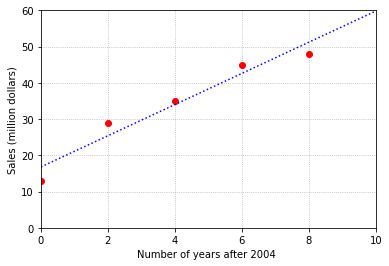

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0,2,4,6,8])
y = np.array([13,29,35,45,48])

ax.grid('True',ls=':')

x_model = np.linspace(0,10,50)
y_model = x_model*X_hat[0,0] + X_hat[1,0]

fig,ax = plt.subplots()

ax.plot(x,y,'ro');
ax.plot(x_model,y_model,'b',ls=':');

ax.set_xlim(0,10);
ax.set_ylim(0,60);
ax.set_xlabel('Number of years after 2004 ');
ax.set_ylabel('Sales (million dollars)');

ax.grid('True',ls=':')

It seems that the regression line fits quite well through the data points.

$(b)$ The regression line is: $ y = 4.3x + 16.8$. 

In order to get the estimated sales in 2020, we need to put $x = 2020-2004 = 16$. Then, we can calculate the value of $y$.

$y = 4.3(16) + 16.8 = 85.6$.

So, in $2020$, the estimated sale will be $85.6$ million dollars.

**Exercise 2:** The concept of least squares can also be used to find polynomials of best fit that are of degree greater than one. Given the points $(-1,0),(0,1),(1,3),$ and $(2,9)$, find the parabola $y = ax^2 + bx + c$ that best fits through the points in the sense of least squares. Then plot the points on top of a graph of the parabola to observe the fit.

**Solution:**

The system to be solved is 

$$
\begin{eqnarray*}
a -b +c & = & 0 \\
0a + 0b + c & = & 1  \\
a + b + c & = & 3 \\
4a + 2b + c & = & 9
\end{eqnarray*}
$$

We can rewrite this system in the following matrix form $AX = B$

$$
\begin{equation}
\left[\begin{array}{rr} 1 & -1 & 1  \\ 0 & 0 & 1 \\ 1 & 1 & 1 \\ 4 & 2 & 1 \end{array}\right]\left[\begin{array}{r} a \\b \\ c \end{array}\right] = 
\left[\begin{array}{r} 0 \\ 1 \\ 3 \\ 9  \end{array}\right]
\end{equation}
$$


Next we form the augmented matrix $[A|B]$ and use $\texttt{FullRowReduction}$ to verify that the system is inconsistent.

In [28]:
A = np.array([[1,-1,1],[0,0,1],[1,1,1],[4,2,1]])
B = np.array([[0],[1],[3],[9]])
A_augmented = np.hstack([A,B])
A_augmented_reduced = lag.FullRowReduction(A_augmented)
print(A_augmented_reduced)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


The pivot in the last column indicates that the system is inconsistent, so we solve the normal equations $A^TAX = A^TB$.

In [31]:
A_N = A.transpose()@A
B_N = A.transpose()@B
Solution = lag.SolveSystem(A_N,B_N)
print(Solution)

[[1.25]
 [1.65]
 [0.55]]


Therefore the parabola that best fits our data, in the sense of least squares, is $y = 1.25x^2 + 1.65x + 0.55$

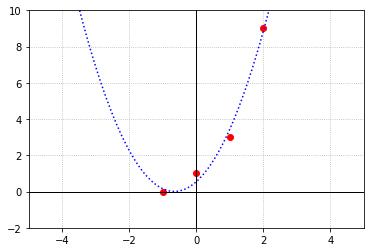

In [33]:
a = Solution[0,0]
b = Solution[1,0]
c = Solution[2,0]

x = np.array([-1, 0, 1, 2])
y = np.array([0, 1, 3, 9])

fig,ax = plt.subplots()

x_fit = np.linspace(-5,5,100)
y_fit = a*x_fit**2 + b*x_fit + c

ax.plot(x,y,'ro');
ax.plot(x_fit,y_fit,'b',ls=':');

ax.set_xlim(-5,5);
ax.set_ylim(-2,10);
ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)
ax.grid('True',ls=':')

**Exercise 3:** Lets revisit a problem we saw earlier to see how the technique of least squares compares to our previous method of interpolation. Here are the average radii of the orbits of the planets in our solar system, and their average orbital velocity around the Sun.

|Planet                           | Distance from Sun (million km)  | Orbital Velocity (km/s)         |
| ------------------------------- | ------------------------------- | ------------------------------- |
|Mercury                          | 57.9                            | 47.4                            |
|Venus                            | 108.2                           | 35.0                            | 
|Earth                            | 149.6                           | 29.8                            |
|Mars                             | 228.0                           | 24.1                            |
|Jupiter                          | 778.5                           | 13.1                            |
|Saturn                           | 1432.0                          | 9.7                             |
|Uranus                           | 2867.0                          | 6.8                             |
|Neptune                          | 4515.0                          | 5.4                             |

$(a)$ Use the method of least squares to find the cubic polynomial of best fit for these points. Plot the data points together with the graph of the polynomial to observe the fit.

$(b)$ The dwarf planet Ceres has an average distance from the sun of 413.5 million km. What does the polynomial suggest the value would be? How closely does this agree with what the points seem to suggest?

**Solution:**

The system to be solved is 

$$
\begin{eqnarray*}
57.9^3a + 57.9^2b + 57.9c + d & = & 47.4 \\
108.2^3a + 108.2^2b + 108.2c + d & = & 35.0  \\
149.6^3a + 149.6^2b + 149.6c + d & = & 29.8 \\
228.0^3a + 228.0^2b + 228.0c + d & = & 24.1 \\
778.5^3a + 778.5^2b + 778.5c + d & = & 13.1 \\
1432.0^3a + 1432.0^2b + 1432.0c + d & = & 9.7  \\
2867.0^3a + 2867.0^2b + 2867.0c + d & = & 6.8 \\
4515.0^3a + 4515.0^2b + 4515.0c + d & = & 5.4 \\
\end{eqnarray*}
$$

We can rewrite this system in the following matrix form $AX = B$

$$
\begin{equation}
\left[\begin{array}{rr} 57.9^3 & 57.9^2 & 57.9 & 1  \\ 108.2^3 & 108.2^2 & 108.2 & 1 \\ 149.6^3 & 149.6^2 & 149.6 & 1 \\ 228.0^3 & 228.0^2 & 228.0 & 1 \\ 778.5^3 & 778.5^2 & 778.5 & 1 \\ 1432.0^3 & 1432.0^2 & 1432.0 & 1 \\ 2867.0^3 & 2867.0^2 & 2867.0 & 1 \\ 4515.0^3 & 4515.0^2 & 4515.0 & 1 \end{array}\right]\left[\begin{array}{r} a \\b \\ c \\ d \end{array}\right] = 
\left[\begin{array}{r} 47.4 \\ 35.0 \\ 29.8 \\ 24.1 \\ 13.1 \\ 9.7 \\ 6.8 \\ 5.4  \end{array}\right]
\end{equation}
$$

Next we form the augmented matrix $[A|B]$ and use $\texttt{FullRowReduction}$ to verify that the system is inconsistent.

In [65]:
A = np.array([[57.9**3,57.9**2,57.9,1],[108.2**3,108.2**2,108.2,1],[149.6**3,149.6**2,149.6,1],[228**3,228.0**2,228.0,1],[778.5**3,778.5**2,778.5,1],[1432**3,1432.0**2,1432,1],[2867**3,2867.0**2,2867,1],[4515**3,4515**2,4515,1]])
B = np.array([[47.4],[35],[29.8],[24.1],[13.1],[9.7],[6.8],[5.4]])
A_augmented = np.hstack([A,B])
A_augmented_reduced = lag.FullRowReduction(A_augmented)
print(A_augmented_reduced)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


The pivot in the last column indicates that the system is inconsistent, so we solve the normal equations $A^TAX = A^TB$.

In [59]:
A_N = A.transpose()@A
B_N = A.transpose()@B
Solution = lag.SolveSystem(A_N,B_N)
print(Solution)

[[-2.29799177e-09]
 [ 1.90052171e-05]
 [-4.67736769e-02]
 [ 4.03880682e+01]]


Therefore the parabola that best fits our data, in the sense of least squares, is $y = (-2.30 \times 10^{-9})x^3 + (1.90 \times 10^{-5})x^2 + (-4.68 \times 10^{-2})x + 40.39$

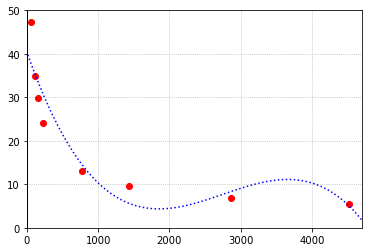

In [67]:
a = Solution[0,0]
b = Solution[1,0]
c = Solution[2,0]
d = Solution[3,0]

x = np.array([57.9, 108.2, 149.6, 228, 778.5, 1432, 2867, 4515])
y = np.array([47.4, 35, 29.8, 24.1, 13.1, 9.7, 6.8, 5.4])

fig,ax = plt.subplots()

x_fit = np.linspace(-5,4700,100)
y_fit = a*x_fit**3 + b*x_fit**2 + c*x_fit + d

ax.plot(x,y,'ro');
ax.plot(x_fit,y_fit,'b',ls=':');

ax.set_xlim(0,4700);
ax.set_ylim(0,50);
ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)
ax.grid('True',ls=':')

The polynomial looks like it takes on a value near 22 when $x = 413.5$, which is quite close to what the points seem to suggest.

#### Information Retrieval

**Exercise 1:** Write a function that performs the same task as the $\texttt{laguide}$ function $\texttt{ScaleMatrixRows}$.  That is, it should accept an $m \times n$ matrix as an argument, and return a matrix where each entry has been divided by the magnitude of the row in which it is located.  Test your function by comparing results with $\texttt{ScaleMatrixRows}$.  


In [ ]:
## Code solution here.

**Exercise 2:** The search method described in this section often yields the same results as the one described in [Chapter 3](Applications_VS.ipynb).  Construct an example where the two methods yield *different* results.  
(*Hint: If we ignore the actual words involved, we see the question is one of matrix multiplication.  Let $A$ be a $4\times 6$ database matrix consisting of ones and zeros and let $A_u$ be the matrix returned by $\texttt{ScaleMatrixRows(A)}$.  Let $X$ be a $6\times 1$ search vector consisting of ones and zeros and let $X_u = X/||X||$.  To build the required example, arrange the ones and zeros in $A$ and $X$ such that the largest entry in $AX$ appears in a different location than the largest entry in $A_uX_u$.*)

**Solution:**

These search algorithms may differ in their results when the rows of the database matrix have large variations in the number of ones they contain. The method described in [Chapter 3](Applications_VS.ipynb) simply counts the number of matching keywords, but is unaffected by the number of keywords in the row not found in the query vector. In contrast, the method we learned in this section scales the rows our database matrix by how many keywords are found in each row. This means that a row in the matrix which includes many keywords not found in the query vector will contribute less to the dot product for each correctly matching keyword than a row that contains fewer of the searchable keywords that are not in the query vector.

As an example, consider the database matrix $A$ and the query vector $X$ defined below. Row four contains one more keyword in the query vector than row one, but also includes four searchable keywords that are not included in the query vector. This leads to the two methods giving conflicting results.

In [3]:
A = np.array([[0,0,0,0,0,1],[1,0,1,0,1,0],[0,0,0,1,1,1],[1,1,1,1,1,1]])
A_u = lag.ScaleMatrixRows(A)
X = np.array([[1],[0],[0],[0],[0],[1]])
X_u = X/lag.Magnitude(X)
print(A,'\n')
print(A_u,'\n')
print(X,'\n')
print(X_u)

[[0 0 0 0 0 1]
 [1 0 1 0 1 0]
 [0 0 0 1 1 1]
 [1 1 1 1 1 1]] 

[[0.         0.         0.         0.         0.         1.        ]
 [0.57735027 0.         0.57735027 0.         0.57735027 0.        ]
 [0.         0.         0.         0.57735027 0.57735027 0.57735027]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]] 

[[1]
 [0]
 [0]
 [0]
 [0]
 [1]] 

[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]]


In [4]:
print(A@X,'\n')
print(A_u@X_u)

[[1]
 [1]
 [1]
 [2]] 

[[0.70710678]
 [0.40824829]
 [0.40824829]
 [0.57735027]]


The method from Chapter 3 suggests the fourth row is the best match, but the method learned in this section suggests that the first row is the best match.

**Exercise 3:** Suppose that we want to search for entries matching the words "information", "retrieval", and "computations". Use the information discussed in this section to determine the webpage in the database that contains all or most of the keywords in the search vector.

**Solution:**

In [3]:
T1_raw = np.array([[0,0,1,0,1,0,0,1,0,0]])
T1_scaled = T1_raw/lag.Magnitude(T1_raw.transpose())

print("T1_scaled: \n", np.round(T1_scaled,4), '\n')

T1_scaled: 
 [[0.     0.     0.5774 0.     0.5774 0.     0.     0.5774 0.     0.    ]] 



We can directly use the database matrix developed in this section.

In [5]:
T1 = np.array([[1, 1, 0, 0, 0, 0, 0, 0, 1, 0]])
T2 = np.array([[0, 0, 0, 1, 0, 0, 1, 0, 1, 0]])
T3 = np.array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 1]])
T4 = np.array([[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]])
T5 = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 1, 1]])
T6 = np.array([[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]])

D = np.vstack((T1,T2,T3,T4,T5,T6))
D_scaled = lag.ScaleMatrixRows(D)
print(np.round(D_scaled,4))
print("\n")


T1_scaled = T1_scaled.reshape((10,1))

result = D_scaled@T1_scaled

print(np.round(result, 4))

[[0.5774 0.5774 0.     0.     0.     0.     0.     0.     0.5774 0.    ]
 [0.     0.     0.     0.5774 0.     0.     0.5774 0.     0.5774 0.    ]
 [0.     0.     0.5774 0.     0.     0.     0.     0.5774 0.     0.5774]
 [0.     0.     0.5774 0.     0.     0.5774 0.     0.5774 0.     0.    ]
 [0.     0.5774 0.     0.     0.     0.     0.     0.     0.5774 0.5774]
 [0.     0.     0.5774 0.     0.5774 0.     0.     0.5774 0.     0.    ]]


[[0.    ]
 [0.    ]
 [0.6667]
 [0.6667]
 [0.    ]
 [1.    ]]


Since the sixth entry of the resulting vector is $1$. This means that the sixth webpage is the one that contains all the keywords we are searching for. Therefore, sixth page will contain the most relevant information.

**Exercise 4:** The following example of a database with webpages containing the content related to Global Warming. The set of searchable keywords is: **\{causes, effects, global, warming, fossil-fuels, climate , potentials, change, actions, prevent \}**

Some titles in this database are as follows:

- Causes of Global Warming
- Global Warming vs Climate change
- Fossil Fuels - A Major cause of Global Warming
- Actions to prevent Global Warming
- Potentials of Global Warming
- Effects of Global Warming

Suppose the keywords we want to search are "potentials", "global" and "warming". Create the search vector and database matrix. Analyse the resulting vector to find the webpage containing the most relevant information.

**Solution:**

In [6]:
## Creating the search vector

S1_raw = np.array([[0,0,1,1,0,0,1,0,0,0]])
S1_scaled = S1_raw/lag.Magnitude(S1_raw.transpose())

print("S1_scaled: \n", np.round(S1_scaled,4), '\n')

S1_scaled: 
 [[0.     0.     0.5774 0.5774 0.     0.     0.5774 0.     0.     0.    ]] 



In [8]:
## Creating the database matrix


S1 = np.array([[1, 0, 1, 1, 0, 0, 0, 0, 0, 0]])
S2 = np.array([[0, 0, 1, 1, 0, 1, 0, 1, 0, 0]])
S3 = np.array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 0]])
S4 = np.array([[0, 0, 1, 1, 0, 0, 0, 0, 1, 1]])
S5 = np.array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0]])
S6 = np.array([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0]])

D = np.vstack((S1,S2,S3,S4,S5,S6))
D_scaled = lag.ScaleMatrixRows(D)
print(np.round(D_scaled,4))
print("\n")


## Creating the resulting vector:

S1_scaled = S1_scaled.reshape((10,1))

result = D_scaled@S1_scaled

print(np.round(result, 4))


[[0.5774 0.     0.5774 0.5774 0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.5    0.5    0.     0.5    0.     0.5    0.     0.    ]
 [0.     0.     0.5774 0.5774 0.5774 0.     0.     0.     0.     0.    ]
 [0.     0.     0.5    0.5    0.     0.     0.     0.     0.5    0.5   ]
 [0.     0.     0.5774 0.5774 0.     0.     0.5774 0.     0.     0.    ]
 [0.     0.5774 0.5774 0.5774 0.     0.     0.     0.     0.     0.    ]]


[[0.6667]
 [0.5774]
 [0.6667]
 [0.5774]
 [1.    ]
 [0.6667]]


Since the fifth entry of the resulting vector is $1$, this means that the fifth webpage contains most of the keywords we are searching for and hence, it has the most relevant information.